# Telecom Churn Case Study

The goal of this notebook is to provide an overview of how write a notebook and create a submission file that successfully solves the churn prediction problem. Please download the datasets, unzip and place them in the same folder as this notebook.

We are going to follow the process called CRISP-DM.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b9/CRISP-DM_Process_Diagram.png/639px-CRISP-DM_Process_Diagram.png" style="height: 400px; width:400px;"/>

After Business and Data Understanding via EDA, we want to prepare data for modelling. Then evaluate and submit our predictions.

# Problem Statement

### Business problem overview

. In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

. For many incumbent operators, retaining high profitable customers is the number one business goal.

. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

. In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

### Definitions of churn
. There are various ways to define churn, such as:

### Revenue-based churn:
. Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue’.

The main shortcoming of this definition is that there are customers who only receive calls/SMSes from their wage-earning counterparts, i.e. they don’t generate revenue but use the services. For example, many users in rural areas only receive calls from their wage-earning siblings in urban areas.

### Usage-based churn:
Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if you define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator.

In this project, we will use the usage-based definition to define churn.

# Objective
- To Predict the customers who are about to churn from a telecom operator
- Business Objective is to predict the High Value Customers only
- We need to predict Churn on the basis of Action Period (Churn period data needs to be deleted after labelling)
  Churn would be based on Usage

### Requirement:

- Churn Prediction Model
- Best Predictor Variables

# Steps to Approach The  Best Solution For This Case Study
There are mainly 6 steps
#### Step 1 :
- Data reading
- Data Understanding
- Data Cleaning
- Imputing missing values 

#### Step-2 :
Need to Filter high value customers

#### Step-3 :
Derive churn
   need to Derive the Target Variable
   
#### Step-4 :
Data Preparation
  - Derived variable
  - EDA
  - Split data in to train and test sets
  - Performing Scaling
 
#### Step-5 :
- Handle class imbalance
- Dimensionality Reduction using PCA
- Classification models to predict Churn (Use various Models )

#### Step-6 :
- Model Evaluation
- Prepare Model for Predictor variables selection (Prepare multiple models & choose the best one)

Finally we need to give best Summarize to the company 

## Import  Libraries

In [307]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import the logistic regression module
from sklearn.linear_model import LogisticRegression

# Importing 'variance_inflation_factor' or VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Import RFE for RFE selection
from sklearn.feature_selection import RFE

# Importing statsmodels
import statsmodels.api as sm

# Importing the precision recall curve
from sklearn.metrics import precision_recall_curve

# Importing evaluation metrics from scikitlearn 
from sklearn import metrics

from imblearn.over_sampling import SMOTE

from sklearn.decomposition import IncrementalPCA

# To suppress the warnings which will be raised
import warnings
warnings.filterwarnings('ignore')

# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [308]:
#pip install imbalanced-learn

In [309]:
# read data
data= pd.read_csv("train.csv")

In [310]:
data.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [311]:
# create backup of data
original_data = data.copy()

In [312]:
#look at the last 5 rows
data.tail() 

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
69994,69994,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,15.760,410.924,...,1,0,NaN,1.0,1.0,221,0.00,0.00,0.00,0
69995,69995,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,160.083,289.129,...,0,0,NaN,NaN,NaN,712,0.00,0.00,0.00,0
69996,69996,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,372.088,258.374,...,0,0,NaN,NaN,NaN,879,0.00,0.00,0.00,0
69997,69997,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,238.575,245.414,...,0,0,1.0,1.0,1.0,277,664.25,1402.96,990.97,0
69998,69998,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,168.269,42.815,...,0,0,1.0,NaN,1.0,1876,0.00,0.00,0.00,0


In [313]:
#check the columns of data
data.columns

Index(['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'arpu_6', 'arpu_7',
       ...
       'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'churn_probability'],
      dtype='object', length=172)

In [314]:
#Checking the numerical columns data distribution statistics
data.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,...,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,34999.000000,109.0,0.0,0.0,0.0,283.134365,278.185912,278.858826,133.153275,133.894438,...,0.081444,0.085487,0.916325,0.909544,0.890319,1220.639709,68.108597,65.935830,60.07674,0.101887
std,20207.115084,0.0,0.0,0.0,0.0,334.213918,344.366927,351.924315,299.963093,311.277193,...,0.634547,0.680035,0.276907,0.286842,0.312501,952.426321,269.328659,267.899034,257.22681,0.302502
min,0.000000,109.0,0.0,0.0,0.0,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,17499.500000,109.0,0.0,0.0,0.0,93.581000,86.714000,84.095000,7.410000,6.675000,...,0.000000,0.000000,1.000000,1.000000,1.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,34999.000000,109.0,0.0,0.0,0.0,197.484000,191.588000,192.234000,34.110000,32.280000,...,0.000000,0.000000,1.000000,1.000000,1.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,52498.500000,109.0,0.0,0.0,0.0,370.791000,365.369500,369.909000,119.390000,115.837500,...,0.000000,0.000000,1.000000,1.000000,1.000000,1813.000000,0.000000,0.000000,0.00000,0.000000
max,69998.000000,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,...,33.000000,41.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.21000,1.000000


In [315]:
#check dataframe for null and datatype 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [316]:
# feature type summary
data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [317]:
# Checking for null values
data.isnull().sum()

id                     0
circle_id              0
loc_og_t2o_mou       702
std_og_t2o_mou       702
loc_ic_t2o_mou       702
                    ... 
aon                    0
aug_vbc_3g             0
jul_vbc_3g             0
jun_vbc_3g             0
churn_probability      0
Length: 172, dtype: int64

In [318]:
# Checking the null value percentage
data.isna().sum()/data.isna().count()*100

id                   0.000000
circle_id            0.000000
loc_og_t2o_mou       1.002871
std_og_t2o_mou       1.002871
loc_ic_t2o_mou       1.002871
                       ...   
aon                  0.000000
aug_vbc_3g           0.000000
jul_vbc_3g           0.000000
jun_vbc_3g           0.000000
churn_probability    0.000000
Length: 172, dtype: float64

In [319]:
# Checking for shape of a data set
data.shape

(69999, 172)

In [320]:
# Checking for the duplicates
data.drop_duplicates(subset=None, inplace=True)
data.shape

(69999, 172)

In [321]:
#check the size of data
data.size

12039828

In [322]:
#check the axes of data
data.axes

[RangeIndex(start=0, stop=69999, step=1),
 Index(['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
        'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
        'arpu_6', 'arpu_7',
        ...
        'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8',
        'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'churn_probability'],
       dtype='object', length=172)]

In [323]:
#check the dimensions of data
data.ndim

2

In [324]:
#check the values of data
data.values

array([[0, 109, 0.0, ..., 0.0, 0.0, 0],
       [1, 109, 0.0, ..., 0.0, 0.0, 0],
       [2, 109, 0.0, ..., 0.0, 0.0, 0],
       ...,
       [69996, 109, 0.0, ..., 0.0, 0.0, 0],
       [69997, 109, 0.0, ..., 1402.96, 990.97, 0],
       [69998, 109, 0.0, ..., 0.0, 0.0, 0]], dtype=object)

In [325]:
#list of columns
pd.DataFrame(data.columns)

,0
0,id
1,circle_id
2,loc_og_t2o_mou
3,std_og_t2o_mou
4,loc_ic_t2o_mou
...,...
167,aon
168,aug_vbc_3g
169,jul_vbc_3g
170,jun_vbc_3g


In [326]:
# look at missing value ratio in each column
data.isnull().sum() * 100 / data.shape[0]

id                   0.000000
circle_id            0.000000
loc_og_t2o_mou       1.002871
std_og_t2o_mou       1.002871
loc_ic_t2o_mou       1.002871
                       ...   
aon                  0.000000
aug_vbc_3g           0.000000
jul_vbc_3g           0.000000
jun_vbc_3g           0.000000
churn_probability    0.000000
Length: 172, dtype: float64

In [327]:
(data.isnull().sum() / data.isnull().count() * 100).sort_values(ascending=False).head(32)

arpu_3g_6                   74.902499
count_rech_2g_6             74.902499
night_pck_user_6            74.902499
arpu_2g_6                   74.902499
date_of_last_rech_data_6    74.902499
total_rech_data_6           74.902499
av_rech_amt_data_6          74.902499
max_rech_data_6             74.902499
count_rech_3g_6             74.902499
fb_user_6                   74.902499
night_pck_user_7            74.478207
date_of_last_rech_data_7    74.478207
total_rech_data_7           74.478207
max_rech_data_7             74.478207
fb_user_7                   74.478207
count_rech_2g_7             74.478207
count_rech_3g_7             74.478207
arpu_3g_7                   74.478207
av_rech_amt_data_7          74.478207
arpu_2g_7                   74.478207
count_rech_2g_8             73.689624
av_rech_amt_data_8          73.689624
night_pck_user_8            73.689624
max_rech_data_8             73.689624
total_rech_data_8           73.689624
arpu_2g_8                   73.689624
arpu_3g_8   

In [328]:
# [Analysis]
# some recharge columns have minimum value of 1 while some don't have
recharge_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 
                 ]

data[recharge_cols].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8
count,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000
mean,2.467612,2.679989,2.652441,1.865323,2.056311,2.016018,0.602288,0.623678,0.636423,126.500000,126.402071,125.374925,192.831096,201.455940,196.815792
std,2.794610,3.073472,3.101265,2.566377,2.799916,2.728246,1.279297,1.401230,1.457058,109.352573,109.459266,109.648799,190.623115,198.346141,192.280532
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,25.000000,25.000000,25.000000,82.000000,92.000000,84.000000
50%,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,145.000000,145.000000,145.000000,154.000000,154.000000,154.000000
75%,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,177.000000,177.000000,179.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,42.000000,48.000000,44.000000,29.000000,34.000000,45.000000,1555.000000,1555.000000,1555.000000,5920.000000,4365.000000,4076.000000


 We can create new feature as total_rech_amt_data using total_rech_data and av_rech_amt_data to capture amount utilized by customer for data.

 Also as the minimum value is 1 we can impute the NA values by 0, Considering there were no recharges done by the customer.

In [329]:
# It is also observed that the recharge date and the recharge value are missing together which means the customer didn't recharge
data.loc[data.total_rech_data_6.isnull() & data.date_of_last_rech_data_6.isnull(), ["total_rech_data_6", "date_of_last_rech_data_6"]].head(20)

,total_rech_data_6,date_of_last_rech_data_6
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
5,NaN,NaN
6,NaN,NaN
8,NaN,NaN
9,NaN,NaN
11,NaN,NaN
12,NaN,NaN


In the recharge variables where minumum value is 1, we can impute missing values with zeroes since it means customer didn't recharge their numbers that month.

#### Impute Zero Values for Recharge columns

In [330]:
# [Action]

# create a list of recharge columns where we will impute missing values with zeroes
zero_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8'
       ]

In [331]:
# impute missing values with 0
data[zero_impute] = data[zero_impute].apply(lambda x: x.fillna(0))

In [332]:
# now we have to  make sure the values are imputed correctly for that we can check "Missing value ratio"
data[zero_impute].isnull().sum()*100/data.shape[1]

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
dtype: float64

In [333]:
# now we can check the "statistics Summary"
data[zero_impute].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000
mean,0.619309,0.683981,0.697867,48.395787,51.415168,51.782975,31.748339,32.260075,32.986614
std,1.762010,1.943193,1.973434,126.923180,133.246541,131.291162,77.519536,78.069163,78.808337
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,8.000000,17.000000,23.000000,8.000000,14.000000,17.000000
max,61.000000,54.000000,60.000000,5920.000000,4365.000000,4076.000000,1555.000000,1555.000000,1555.000000


In [334]:
# [Analysis]
# now we can create some column name list by there types using description of columns
id_cols = ['id', 'circle_id']

date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',             
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',             
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8'             
            ]

cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',             
             'fb_user_6',
             'fb_user_7',
             'fb_user_8'             
            ]

num_cols = [column for column in data.columns if column not in id_cols + date_cols + cat_cols]

# print the number of columns in each list
print("#ID cols: %d\n#Date cols:%d\n#Numeric cols:%d\n#Category cols:%d" % (len(id_cols), len(date_cols), len(num_cols), len(cat_cols)))

# check if we have missed any column or not
print(len(id_cols) + len(date_cols) + len(num_cols) + len(cat_cols) == data.shape[1])

#ID cols: 2
#Date cols:9
#Numeric cols:155
#Category cols:6
True


In [335]:
# [Action]
# drop id and date columns
data = data.drop(id_cols + date_cols, axis=1)
#check the shape again
data.shape

(69999, 161)

In [336]:
# replace missing values with '-1' in categorical columns
data[cat_cols] = data[cat_cols].apply(lambda x: x.fillna(-1))

In [337]:
# missing value ratio
data[cat_cols].isnull().sum()*100/data.shape[0]

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
dtype: float64

Droping variables with more than 70% of missing values (we can call it as threshold )

In [338]:
(data.isnull().sum() / data.isnull().count() * 100).sort_values(ascending=False).head(15)

count_rech_3g_6     74.902499
arpu_2g_6           74.902499
count_rech_2g_6     74.902499
arpu_3g_6           74.902499
arpu_2g_7           74.478207
count_rech_2g_7     74.478207
count_rech_3g_7     74.478207
arpu_3g_7           74.478207
arpu_3g_8           73.689624
count_rech_2g_8     73.689624
count_rech_3g_8     73.689624
arpu_2g_8           73.689624
std_og_t2m_mou_8     5.290076
std_og_t2f_mou_8     5.290076
std_og_t2c_mou_8     5.290076
dtype: float64

In [339]:
# [Action]
initial_cols = data.shape[1]

MISSING_THRESHOLD = 0.7

include_cols = list(data.apply(lambda column: True if column.isnull().sum()/data.shape[0] < MISSING_THRESHOLD else False))

drop_missing = pd.DataFrame({'features':data.columns , 'include': include_cols})
drop_missing.loc[drop_missing.include == True,:]

,features,include
0,loc_og_t2o_mou,True
1,std_og_t2o_mou,True
2,loc_ic_t2o_mou,True
3,arpu_6,True
4,arpu_7,True
...,...,...
156,aon,True
157,aug_vbc_3g,True
158,jul_vbc_3g,True
159,jun_vbc_3g,True


In [340]:
# [Action]
# now we can drop  some more columns
data = data.loc[:, include_cols]

dropped_cols = data.shape[1] - initial_cols
dropped_cols

-12

In [341]:
#rechecking the shape of a dataframe
data.shape

(69999, 149)

In [342]:
# rechecking the missing values for how many missing values has left
data.isnull().sum()*100/data.shape[0]

loc_og_t2o_mou       1.002871
std_og_t2o_mou       1.002871
loc_ic_t2o_mou       1.002871
arpu_6               0.000000
arpu_7               0.000000
                       ...   
aon                  0.000000
aug_vbc_3g           0.000000
jul_vbc_3g           0.000000
jun_vbc_3g           0.000000
churn_probability    0.000000
Length: 149, dtype: float64

In [343]:
# [Action]
num_cols = [column for column in data.columns if column not in id_cols + date_cols + cat_cols]
num_cols

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou

In [344]:
#imputing with meadian for num_cols
data[num_cols] = data[num_cols].apply(lambda x: x.fillna(x.median()))

In [345]:
#again checking for the missing values
data.isnull().sum()*100/data.shape[0]

loc_og_t2o_mou       0.0
std_og_t2o_mou       0.0
loc_ic_t2o_mou       0.0
arpu_6               0.0
arpu_7               0.0
                    ... 
aon                  0.0
aug_vbc_3g           0.0
jul_vbc_3g           0.0
jun_vbc_3g           0.0
churn_probability    0.0
Length: 149, dtype: float64

In churn prediction, we assume that there are three phases of customer lifecycle :

- The ‘good & action’ phase [Month 6 & 7]
- The ‘churn’ phase [Month 8]
In this case, since we are working over a three-month window, the first two months are the ‘good & action’ phase, the third month is the ‘churn’ phase.

# Step 2:

# Filter high-value customers

Here we can take good phase ( it means month 6 and 7) data to get high value customers

In [346]:
# calculate the total data recharge amount for June and July --> number of recharges * average recharge amount
data['total_data_rech_6'] = data.total_rech_data_6 * data.av_rech_amt_data_6
data['total_data_rech_7'] = data.total_rech_data_7 * data.av_rech_amt_data_7

add total data recharge and total recharge to get total combined recharge amount for a month

In [347]:
# calculate total recharge amount for June and July --> call recharge amount + data recharge amount
data['amt_data_6'] = data.total_rech_amt_6 + data.total_data_rech_6
data['amt_data_7'] = data.total_rech_amt_7 + data.total_data_rech_7

In [348]:
# calculate average recharge done by customer in June and July
data['av_amt_data_6_7'] = (data.amt_data_6 + data.amt_data_7)/2

In [349]:
# look at the 70th percentile recharge amount
print("Recharge amount at 70th percentile: {0}".format(data.av_amt_data_6_7.quantile(0.7)))


Recharge amount at 70th percentile: 477.5


In [350]:
data.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_data_rech_6,total_data_rech_7,amt_data_6,amt_data_7,av_amt_data_6_7
0,0.0,0.0,0.0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,...,1958,0.0,0.0,0.0,0,0.0,0.0,77.0,65.0,71.0
1,0.0,0.0,0.0,0.000,122.787,42.953,0.00,0.00,0.00,0.00,...,710,0.0,0.0,0.0,0,0.0,145.0,0.0,290.0,145.0
2,0.0,0.0,0.0,60.806,103.176,0.000,0.53,15.93,0.00,53.99,...,882,0.0,0.0,0.0,0,0.0,0.0,70.0,120.0,95.0
3,0.0,0.0,0.0,156.362,205.260,111.095,7.26,16.01,0.00,68.76,...,982,0.0,0.0,0.0,0,0.0,0.0,160.0,240.0,200.0
4,0.0,0.0,0.0,240.708,128.191,101.565,21.28,4.83,6.13,56.99,...,647,0.0,0.0,0.0,0,1225.0,1337.0,1515.0,1473.0,1494.0


In [351]:
# retain only those customers who have recharged their mobiles with more than or equal to 70th percentile amount
data_filtered = data.loc[data.av_amt_data_6_7 >= data.av_amt_data_6_7.quantile(0.7), :]
data_filtered = data_filtered.reset_index(drop=True)


In [352]:
data_filtered.shape

(21013, 154)

In [353]:
# delete variables created to filter high-value customers
data_filtered = data_filtered.drop(['total_data_rech_6', 'total_data_rech_7',
                                      'amt_data_6', 'amt_data_7', 'av_amt_data_6_7'], axis=1)


In [354]:
data_filtered.shape

(21013, 149)

 hear we're left with 21,013 rows  and 149 columns after selecting the customers who have provided recharge value of more than or equal to the recharge value of the 70th percentile customer.

# Step 3:

# Derive churn

Derive churn means hear we are using 8 month(The ‘churn’ phase) data , To get the target variable(In this case stydy they did not provide any target variable we have to derive it from churn phase data)
For that, we need to find the derive churn variable using total_ic_mou_8,total_og_mou_8,vol_2g_mb_8 and vol_3g_mb_8 attributes

In [355]:
# Selecting the columns to define churn variable (i.e. TARGET Variable)
data_col=['total_ic_mou_8','total_og_mou_8','vol_2g_mb_8','vol_3g_mb_8']
data_filtered[data_col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21013 entries, 0 to 21012
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total_ic_mou_8  21013 non-null  float64
 1   total_og_mou_8  21013 non-null  float64
 2   vol_2g_mb_8     21013 non-null  float64
 3   vol_3g_mb_8     21013 non-null  float64
dtypes: float64(4)
memory usage: 656.8 KB


churn_probability
0    27.534679
1     2.484321
Name: count, dtype: float64


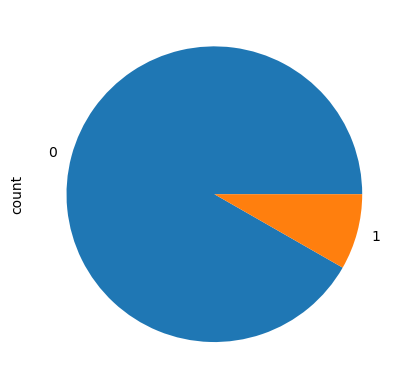

In [356]:
# lets find out churn/non churn percentage
print((data_filtered['churn_probability'].value_counts()/len(data))*100)
((data_filtered['churn_probability'].value_counts()/len(data))*100).plot(kind="pie")
plt.show()

#### ***As we can see that 90% of the customers do not churn, there is a possibility of class imbalance*** 
Since this variable churn is the target variable, all the columns relating to this variable(i.e. all columns with suffix _8) can be dropped forn the dataset.


We can still clean the data by few possible columns relating to the good phase.

As we derived few columns in the good phase earlier, we can drop those related columns during creation.

In [357]:
#data['total_rech_amt_data_6']=data['av_rech_amt_data_6'] * data['total_rech_data_6']
# data['total_rech_amt_data_7']=data['av_rech_amt_data_7'] * data['total_rech_data_7']

# # Calculating the overall recharge amount for the months 6,7 and 8

# data['overall_rech_amt_6'] = data['total_rech_amt_data_6'] + data['total_rech_amt_6']
# data['overall_rech_amt_7'] = data['total_rech_amt_data_7'] + data['total_rech_amt_7']

# [Action]
data_filtered.drop(['av_rech_amt_data_6',
                   'total_rech_data_6','total_rech_amt_6',
                  'av_rech_amt_data_7',
                   'total_rech_data_7','total_rech_amt_7'], axis=1, inplace=True)

We can also create new columns for the defining the good phase variables and drop the seperate 6th and 7 month variables.

Before proceding to check the remaining missing value handling, let us check the collineartity of the indepedent variables and try to understand their dependencies.

In [358]:
# creating a list of column names for each month
mon_6_cols = [col for col in data_filtered.columns if '_6' in col]
mon_7_cols = [col for col in data_filtered.columns if '_7' in col]
mon_8_cols = [col for col in data_filtered.columns if '_8' in col]

In [359]:
mon_7_cols

['arpu_7',
 'onnet_mou_7',
 'offnet_mou_7',
 'roam_ic_mou_7',
 'roam_og_mou_7',
 'loc_og_t2t_mou_7',
 'loc_og_t2m_mou_7',
 'loc_og_t2f_mou_7',
 'loc_og_t2c_mou_7',
 'loc_og_mou_7',
 'std_og_t2t_mou_7',
 'std_og_t2m_mou_7',
 'std_og_t2f_mou_7',
 'std_og_t2c_mou_7',
 'std_og_mou_7',
 'isd_og_mou_7',
 'spl_og_mou_7',
 'og_others_7',
 'total_og_mou_7',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2f_mou_7',
 'loc_ic_mou_7',
 'std_ic_t2t_mou_7',
 'std_ic_t2m_mou_7',
 'std_ic_t2f_mou_7',
 'std_ic_t2o_mou_7',
 'std_ic_mou_7',
 'total_ic_mou_7',
 'spl_ic_mou_7',
 'isd_ic_mou_7',
 'ic_others_7',
 'total_rech_num_7',
 'max_rech_amt_7',
 'last_day_rch_amt_7',
 'max_rech_data_7',
 'vol_2g_mb_7',
 'vol_3g_mb_7',
 'night_pck_user_7',
 'monthly_2g_7',
 'sachet_2g_7',
 'monthly_3g_7',
 'sachet_3g_7',
 'fb_user_7']

In [360]:
# lets check the correlation amongst the independent variables, drop the highly correlated ones
data_corr = data_filtered.corr()
data_corr.loc[:,:] = np.tril(data_corr, k=-1)
data_corr = data_corr.stack()
data_corr
data_corr[(data_corr > 0.80) | (data_corr < -0.80)].sort_values(ascending=False)

total_rech_amt_8    arpu_8               0.958953
fb_user_6           night_pck_user_6     0.957744
isd_og_mou_8        isd_og_mou_7         0.956635
fb_user_7           night_pck_user_7     0.955499
fb_user_8           night_pck_user_8     0.954382
isd_og_mou_7        isd_og_mou_6         0.936012
isd_og_mou_8        isd_og_mou_6         0.934200
total_ic_mou_6      loc_ic_mou_6         0.901348
total_ic_mou_8      loc_ic_mou_8         0.898511
sachet_2g_8         total_rech_data_8    0.897476
total_ic_mou_7      loc_ic_mou_7         0.883143
std_og_t2t_mou_7    onnet_mou_7          0.861786
std_og_t2t_mou_6    onnet_mou_6          0.860921
std_og_t2t_mou_8    onnet_mou_8          0.858635
std_og_t2m_mou_7    offnet_mou_7         0.857958
std_og_t2m_mou_8    offnet_mou_8         0.855066
total_og_mou_8      std_og_mou_8         0.850737
total_og_mou_7      std_og_mou_7         0.850341
loc_ic_mou_6        loc_ic_t2m_mou_6     0.846101
loc_og_mou_8        loc_og_mou_7         0.842607


In [361]:
# [Action]
col_to_drop=['fb_user_6','fb_user_7','total_ic_mou_6','total_ic_mou_7',               
               'std_og_t2t_mou_7','std_og_t2t_mou_6' ,'std_og_t2m_mou_7','std_ic_mou_7',]

# These columns can be dropped as they are highly collinered with other predictor variables.
# criteria set is for collinearity of 85%

#  dropping these column
data_filtered.drop(col_to_drop, axis=1, inplace=True)

In [362]:
# The curent dimension of the dataset after dropping few unwanted columns
data_filtered.shape

(21013, 135)

# Step 4:
# Data preparation

# i.Deriving new variables to understand the data 

# ii.EDA

In [363]:
# We have a column called 'aon'

# we can derive new variables from this to explain the data w.r.t churn.

# creating a new variable 'tenure'
# [Action]
data_filtered['tenure'] = (data_filtered['aon']/30).round(0)

# Since we derived a new column from 'aon', we can drop it
data_filtered.drop('aon',axis=1, inplace=True)

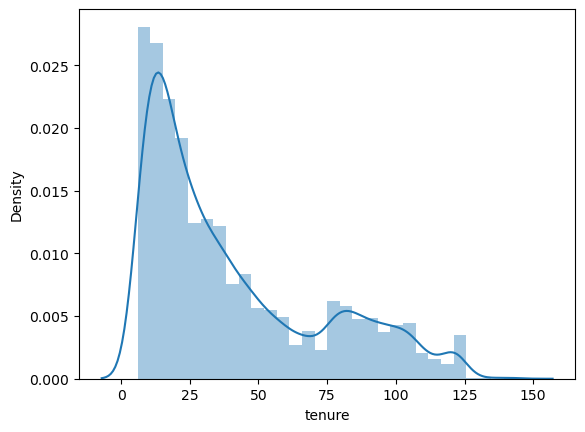

In [364]:
# Checking the distribution of he tenure variable

sns.distplot(data_filtered['tenure'],bins=30)
plt.show()

In [365]:
# [Action]
# [HB] tenure_range is created and then dropped later.  Then do really need it?
# [HB] Is it just for analysis
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
data_filtered['tenure_range'] = pd.cut(data_filtered['tenure'], tn_range, labels=tn_label)
data_filtered['tenure_range'].head()

0    1-2 Yrs
1    1-2 Yrs
2    1-2 Yrs
3    2-5 Yrs
4    1-2 Yrs
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

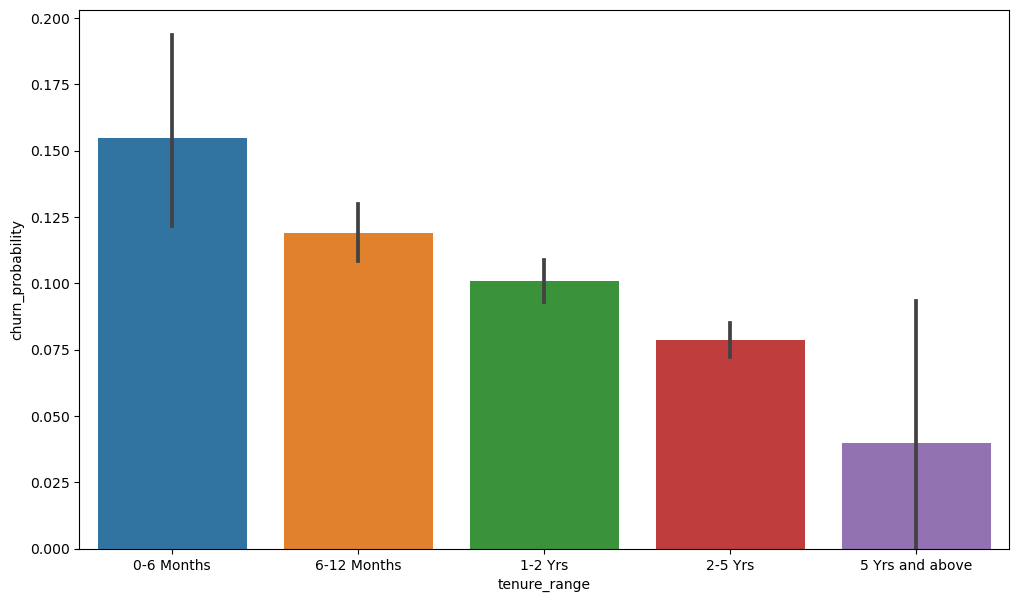

In [366]:
# Plotting a bar plot for tenure range
plt.figure(figsize=[12,7])
sns.barplot(x='tenure_range',y='churn_probability', data=data_filtered )
plt.show()

It can be seen that the maximum churn rate happens within 0-6 month, but it gradually decreases as the customer retains in the network.

The average revenue per user is good phase of customer is given by arpu_6 and arpu_7. since we have two separate averages, lets take an average to these two and drop the other columns

In [367]:
# [Action]
data_filtered["avg_arpu_6_7"]= (data_filtered['arpu_6']+data_filtered['arpu_7'])/2
data_filtered['avg_arpu_6_7'].head()

0     184.4495
1     478.9215
2    1018.2270
3     362.0215
4     370.7370
Name: avg_arpu_6_7, dtype: float64

In [368]:
# Lets drop the original columns as they are derived to a new column for better understanding of the data

data_filtered.drop(['arpu_6','arpu_7'], axis=1, inplace=True)


# The curent dimension of the dataset after dropping few unwanted columns
data_filtered.shape

(21013, 135)

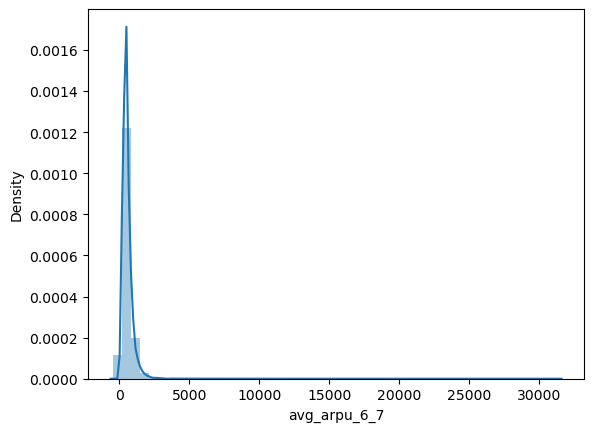

In [369]:
# Visualizing the column created
sns.distplot(data_filtered['avg_arpu_6_7'])
plt.show()

In [370]:
# Checking Correlation between target variable(SalePrice) with the other variable in the dataset
plt.figure(figsize=(10,50))
heatmap_churn = sns.heatmap(data_filtered.corr()[['churn_probability']].sort_values(ascending=False, by='churn_probability'),annot=True, 
                                cmap='summer')
heatmap_churn.set_title("Features Correlating with Churn variable", fontsize=15)

ValueError: could not convert string to float: '1-2 Yrs'

<Figure size 1000x5000 with 0 Axes>

In [371]:
data_filtered.columns

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_8',
       'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8',
       ...
       'sachet_3g_7', 'sachet_3g_8', 'fb_user_8', 'aug_vbc_3g', 'jul_vbc_3g',
       'jun_vbc_3g', 'churn_probability', 'tenure', 'tenure_range',
       'avg_arpu_6_7'],
      dtype='object', length=135)

- Avg Outgoing Calls & calls on roaming for 6th & 7th months are positively correlated with churn.
- Avg Revenue, No. of Recharge for 8th month has negative correlation with churn.

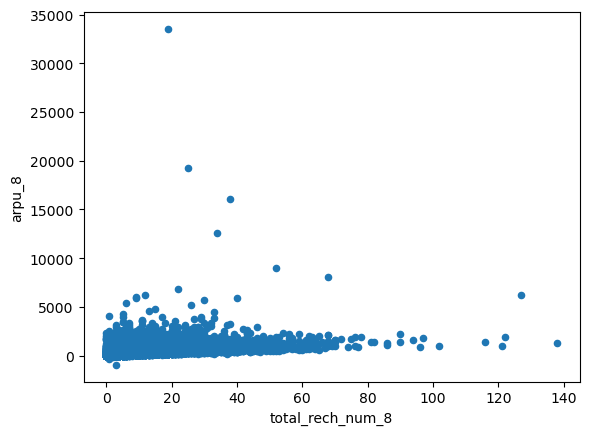

In [372]:
# lets now draw a scatter plot between total recharge and avg revenue for the 8th month
data_filtered[['total_rech_num_8', 'arpu_8']].plot.scatter(x = 'total_rech_num_8',
                                                              y='arpu_8')
plt.show()

In [373]:
# [Action] ???
# Creating categories for month 8 column totalrecharge and their count
data_filtered['total_rech_data_group_8']=pd.cut(data_filtered['total_rech_data_8'],[-1,0,10,25,100],labels=["No_Recharge","<=10_Recharges","10-25_Recharges",">25_Recharges"])
data_filtered['total_rech_num_group_8']=pd.cut(data_filtered['total_rech_num_8'],[-1,0,10,25,1000],labels=["No_Recharge","<=10_Recharges","10-25_Recharges",">25_Recharges"])

AttributeError: 'numpy.int64' object has no attribute 'startswith'

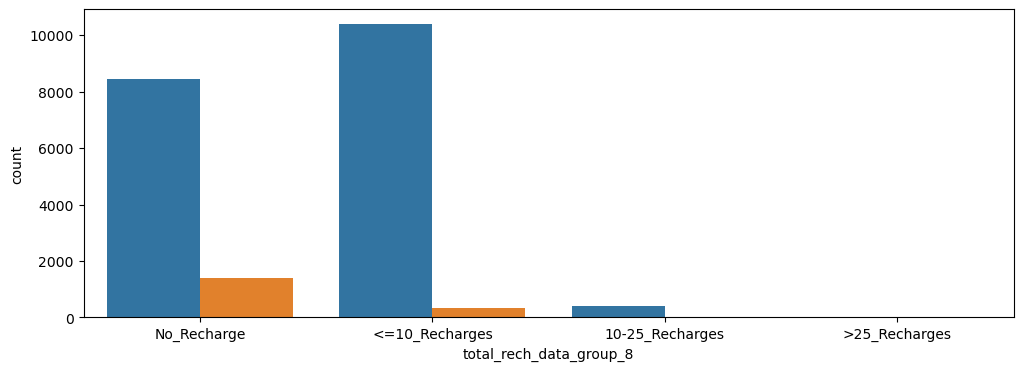

In [374]:
# Plotting the results

plt.figure(figsize=[12,4])
sns.countplot(data=data_filtered,x="total_rech_data_group_8",hue="churn_probability")
print("\t\t\t\t\tDistribution of total_rech_data_8 variable\n",data_filtered['total_rech_data_group_8'].value_counts())
plt.show()
plt.figure(figsize=[12,4])
sns.countplot(data=data_filtered,x="total_rech_num_group_8",hue="churn_probability")
print("\t\t\t\t\tDistribution of total_rech_num_8 variable\n",data_filtered['total_rech_num_group_8'].value_counts())
plt.show()

As the number of recharge rate increases, the churn rate decreases clearly.

In [375]:
# [Action]
# So many feilds are dropped
data_filtered.drop(['av_rech_amt_data_8','total_rech_data_8','sachet_2g_6','sachet_2g_7','sachet_3g_6',
              'sachet_3g_7','sachet_3g_8','last_day_rch_amt_6','last_day_rch_amt_7',
              'last_day_rch_amt_8',], axis=1, inplace=True)

In [376]:
# [Action]
# So many feilds are dropped
data_filtered.drop(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou','roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 
         'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
         'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
         'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 
         'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7',
         'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'spl_og_mou_6',
         'spl_og_mou_7', 'spl_og_mou_8','total_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 
         'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8',
         'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 
         'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8',
         'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_mou_6', 'spl_ic_mou_6', 'spl_ic_mou_7',
         'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8',], axis=1, inplace=True)

In [377]:
data_filtered.shape

(21013, 56)

In [378]:
plt.figure(figsize = (50, 50))
sns.heatmap(data_filtered.corr())
plt.show()

ValueError: could not convert string to float: '1-2 Yrs'

<Figure size 5000x5000 with 0 Axes>

In [379]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21013 entries, 0 to 21012
Data columns (total 56 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   arpu_8                   21013 non-null  float64 
 1   onnet_mou_6              21013 non-null  float64 
 2   onnet_mou_7              21013 non-null  float64 
 3   onnet_mou_8              21013 non-null  float64 
 4   offnet_mou_6             21013 non-null  float64 
 5   offnet_mou_7             21013 non-null  float64 
 6   offnet_mou_8             21013 non-null  float64 
 7   std_og_t2t_mou_8         21013 non-null  float64 
 8   std_og_t2m_mou_8         21013 non-null  float64 
 9   isd_og_mou_8             21013 non-null  float64 
 10  og_others_6              21013 non-null  float64 
 11  og_others_7              21013 non-null  float64 
 12  og_others_8              21013 non-null  float64 
 13  total_og_mou_7           21013 non-null  float64 
 14  total_

In [380]:
# [Action]
data_filtered.drop(['total_rech_data_group_8','total_rech_num_group_8',] , axis=1, inplace=True)

In [381]:
data_filtered.shape

(21013, 54)

In [382]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21013 entries, 0 to 21012
Data columns (total 54 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   arpu_8             21013 non-null  float64 
 1   onnet_mou_6        21013 non-null  float64 
 2   onnet_mou_7        21013 non-null  float64 
 3   onnet_mou_8        21013 non-null  float64 
 4   offnet_mou_6       21013 non-null  float64 
 5   offnet_mou_7       21013 non-null  float64 
 6   offnet_mou_8       21013 non-null  float64 
 7   std_og_t2t_mou_8   21013 non-null  float64 
 8   std_og_t2m_mou_8   21013 non-null  float64 
 9   isd_og_mou_8       21013 non-null  float64 
 10  og_others_6        21013 non-null  float64 
 11  og_others_7        21013 non-null  float64 
 12  og_others_8        21013 non-null  float64 
 13  total_og_mou_7     21013 non-null  float64 
 14  total_og_mou_8     21013 non-null  float64 
 15  std_ic_mou_8       21013 non-null  float64 
 16  tota

In [383]:
# [Action]
data_filtered.drop(['tenure_range'] , axis=1, inplace=True)

In [384]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21013 entries, 0 to 21012
Data columns (total 53 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   arpu_8             21013 non-null  float64
 1   onnet_mou_6        21013 non-null  float64
 2   onnet_mou_7        21013 non-null  float64
 3   onnet_mou_8        21013 non-null  float64
 4   offnet_mou_6       21013 non-null  float64
 5   offnet_mou_7       21013 non-null  float64
 6   offnet_mou_8       21013 non-null  float64
 7   std_og_t2t_mou_8   21013 non-null  float64
 8   std_og_t2m_mou_8   21013 non-null  float64
 9   isd_og_mou_8       21013 non-null  float64
 10  og_others_6        21013 non-null  float64
 11  og_others_7        21013 non-null  float64
 12  og_others_8        21013 non-null  float64
 13  total_og_mou_7     21013 non-null  float64
 14  total_og_mou_8     21013 non-null  float64
 15  std_ic_mou_8       21013 non-null  float64
 16  total_ic_mou_8     210

In [385]:
# [Analysis]
data_rate = (sum(data_filtered["churn_probability"])/len(data_filtered["churn_probability"].index))*100
data_rate

8.275829248560415

# v.Split Data Into Train and Test Data

In [386]:
data_filtered.shape

(21013, 53)

In [387]:
# divide data into train and test
X = data_filtered.drop("churn_probability", axis = 1)
y = data_filtered.churn_probability
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4, stratify = y)

In [388]:
# print shapes of train and test sets
X_train.shape

(15759, 52)

In [389]:
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(15759,)
(5254, 52)
(5254,)


# vi.Perform Scaling

In [390]:
X_train.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,isd_og_mou_8,...,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,fb_user_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,tenure,avg_arpu_6_7
13528,553.107,597.83,448.53,594.29,149.26,175.73,299.99,569.78,194.28,0.00,...,0,0,0,0,-1.0,0.00,0.0,0.00,99.0,533.9885
7183,199.111,364.79,617.33,51.71,124.69,258.86,40.08,0.00,0.00,0.00,...,0,0,0,0,-1.0,0.00,0.0,0.00,37.0,520.9410
14666,267.706,84.68,117.61,87.43,552.86,510.43,383.46,3.40,30.44,1.55,...,1,0,0,0,1.0,197.37,288.6,185.75,93.0,397.1430
17922,409.262,636.51,728.43,700.23,177.04,137.53,162.48,694.38,135.54,0.00,...,0,0,0,0,-1.0,0.00,0.0,0.00,12.0,444.9220
5165,293.627,739.41,185.51,66.08,481.24,673.68,534.98,53.94,488.14,0.00,...,0,0,0,0,-1.0,0.00,0.0,0.00,32.0,470.9800


In [391]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15759 entries, 13528 to 20561
Data columns (total 52 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   arpu_8            15759 non-null  float64
 1   onnet_mou_6       15759 non-null  float64
 2   onnet_mou_7       15759 non-null  float64
 3   onnet_mou_8       15759 non-null  float64
 4   offnet_mou_6      15759 non-null  float64
 5   offnet_mou_7      15759 non-null  float64
 6   offnet_mou_8      15759 non-null  float64
 7   std_og_t2t_mou_8  15759 non-null  float64
 8   std_og_t2m_mou_8  15759 non-null  float64
 9   isd_og_mou_8      15759 non-null  float64
 10  og_others_6       15759 non-null  float64
 11  og_others_7       15759 non-null  float64
 12  og_others_8       15759 non-null  float64
 13  total_og_mou_7    15759 non-null  float64
 14  total_og_mou_8    15759 non-null  float64
 15  std_ic_mou_8      15759 non-null  float64
 16  total_ic_mou_8    15759 non-null  float64

In [392]:
# [Action]
num_col = X_train.select_dtypes(include = ['int64','float64']).columns.tolist()

In [393]:
# apply scaling on the dataset
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])

In [394]:
X_train.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,isd_og_mou_8,...,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,fb_user_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,tenure,avg_arpu_6_7
13528,0.043460,0.081043,0.054982,0.059564,0.017849,0.029850,0.021417,0.071094,0.013927,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.673913,0.030909
7183,0.033196,0.049452,0.075674,0.005183,0.014911,0.043970,0.002861,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.224638,0.030500
14666,0.035185,0.011479,0.014417,0.008763,0.066113,0.086703,0.027376,0.000424,0.002182,0.000427,...,0.022727,0.0,0.0,0.0,1.0,0.015281,0.031487,0.016635,0.630435,0.026618
17922,0.039289,0.086286,0.089293,0.070182,0.021171,0.023361,0.011600,0.086641,0.009716,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.043478,0.028116
5165,0.035937,0.100236,0.022740,0.006623,0.057548,0.114432,0.038193,0.006730,0.034992,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.188406,0.028933


As there are many variables we will start the process of dropping variables after doing the RFE

# Data Modeling and Model Evaluation and Prepare Model for Predictor variables selection


## Data Imbalance Handling
Using SMOTE method, we can balance the data w.r.t. churn variable and proceed further

In [395]:
smote = SMOTE(random_state=42)
X_train_sm,y_train_sm = smote.fit_resample(X_train,y_train)

In [396]:
import numpy as np
print(np.isnan(X_train).any())  # Check for NaN values in X_train


arpu_8              False
onnet_mou_6         False
onnet_mou_7         False
onnet_mou_8         False
offnet_mou_6        False
offnet_mou_7        False
offnet_mou_8        False
std_og_t2t_mou_8    False
std_og_t2m_mou_8    False
isd_og_mou_8        False
og_others_6         False
og_others_7         False
og_others_8         False
total_og_mou_7      False
total_og_mou_8      False
std_ic_mou_8        False
total_ic_mou_8      False
ic_others_6         False
ic_others_7         False
ic_others_8         False
total_rech_num_6    False
total_rech_num_7    False
total_rech_num_8    False
total_rech_amt_8    False
max_rech_amt_6      False
max_rech_amt_7      False
max_rech_amt_8      False
max_rech_data_6     False
max_rech_data_7     False
max_rech_data_8     False
vol_2g_mb_6         False
vol_2g_mb_7         False
vol_2g_mb_8         False
vol_3g_mb_6         False
vol_3g_mb_7         False
vol_3g_mb_8         False
night_pck_user_6    False
night_pck_user_7    False
night_pck_us

In [397]:
print("Dimension of X_train_sm Shape:", X_train_sm.shape)
print("Dimension of y_train_sm Shape:", y_train_sm.shape)

Dimension of X_train_sm Shape: (28910, 52)
Dimension of y_train_sm Shape: (28910,)


# Logistic Regression

In [398]:
# Logistic regression model
logm1 = sm.GLM(y_train_sm,(sm.add_constant(X_train_sm)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                28910
Model:                            GLM   Df Residuals:                    28857
Model Family:                Binomial   Df Model:                           52
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 06 Feb 2024   Deviance:                       22394.
Time:                        21:58:03   Pearson chi2:                 1.80e+07
No. Iterations:                    39   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2170      0.197      1.104      0.270      -0.168       0.602
arpu_8              -5.5828      6.773     -0.824      0.410     -18.858       7.692
onnet_mou_6         -0.7263      0.484     -1.500      0.134      -1.675       0.223
onnet_mou_7         -7.1595      2.151     -3.328      0.001     -11.375      -2.944
onnet_mou_8         75.8806      3.628     20.917      0.000      68.770      82.991
offnet_mou_6        -0.3989      0.567     -0.703      0.482      -1.511       0.713
offnet_mou_7        -5.2920      1.536     -3.445      0.001      -8.303      -2.281
offnet_mou_8        96.9212      4.667     20.769      0.000      87.775     106.068
std_og_t2t_mou_8     7.7649      1.622      4.788      0.000       4.586      10.944
std_og_t2m_mou_8    19.7109      2.965      6.648      0.000      13.900      25.522
isd_og_mou_8        36.3631      4.428      8.212      0.000      27.684      45.042
og_others_6        -14.6087      6.447     -2.266      0.023     -27.244      -1.973
og_others_7         -3.5242      9.742     -0.362      0.718     -22.619      15.570
og_others_8      -5.213e+05    5.8e+07     -0.009      0.993   -1.14e+08    1.13e+08
total_og_mou_7       8.6655      2.010      4.310      0.000       4.725      12.606
total_og_mou_8    -120.3230      4.488    -26.812      0.000    -129.119    -111.527
std_ic_mou_8         9.4941      1.393      6.816      0.000       6.764      12.224
total_ic_mou_8     -21.3638      0.977    -21.869      0.000     -23.278     -19.449
ic_others_6        -11.8896      5.113     -2.325      0.020     -21.911      -1.868
ic_others_7          8.8567      4.551      1.946      0.052      -0.064      17.777
ic_others_8         -1.1223      5.517     -0.203      0.839     -11.935       9.690
total_rech_num_6     1.4315      0.574      2.496      0.013       0.307       2.556
total_rech_num_7     4.6727      0.579      8.068      0.000       3.538       5.808
total_rech_num_8   -10.9223      0.756    -14.452      0.000     -12.404      -9.441
total_rech_amt_8   -87.6504      8.950     -9.793      0.000    -105.193     -70.108
max_rech_amt_6      -1.3481      0.595     -2.267      0.023      -2.514      -0.183
max_rech_amt_7      -0.4347      0.495     -0.878      0.380      -1.404       0.535
max_rech_amt_8       2.8383      1.059      2.681      0.007       0.764       4.913
max_rech_data_6      0.2782      0.543      0.512      0.609      -0.787       1.343
max_rech_data_7      2.7959      0.584      4.786      0.000       1.651       3.941
max_rech_data_8     -1.0049      0.718     -1.400      0.162      -2.412       0.402
vol_2g_mb_6         -0.6271      0.855     -0.734      0.463      -2.303       1.048
vol_2g_mb_7          3.3258      0.734      4.529      0.000       1.886       4.765
vol_2g_mb_8         -4.

# Logistic Regression using Feature Selection (RFE method)


In [399]:
logreg = LogisticRegression()

from sklearn.feature_selection import RFE

# running RFE with 20 variables as output
rfe = RFE(logreg,  n_features_to_select= 20)             
rfe = rfe.fit(X_train_sm, y_train_sm)

In [400]:
rfe.support_

array([ True, False,  True, False,  True,  True, False, False, False,
       False, False, False, False, False,  True,  True,  True, False,
       False, False,  True,  True,  True,  True,  True, False,  True,
       False, False, False, False, False,  True, False, False,  True,
       False, False, False, False, False,  True,  True, False, False,
        True, False,  True, False, False, False,  True])

In [401]:
rfe_columns=X_train_sm.columns[rfe.support_]
print("The selected columns by RFE for modelling are: \n\n",rfe_columns)

The selected columns by RFE for modelling are: 

 Index(['arpu_8', 'onnet_mou_7', 'offnet_mou_6', 'offnet_mou_7',
       'total_og_mou_8', 'std_ic_mou_8', 'total_ic_mou_8', 'total_rech_num_6',
       'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_8', 'vol_2g_mb_8', 'vol_3g_mb_8',
       'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'aug_vbc_3g',
       'avg_arpu_6_7'],
      dtype='object')


In [402]:
list(zip(X_train_sm.columns, rfe.support_, rfe.ranking_))

[('arpu_8', True, 1),
 ('onnet_mou_6', False, 3),
 ('onnet_mou_7', True, 1),
 ('onnet_mou_8', False, 27),
 ('offnet_mou_6', True, 1),
 ('offnet_mou_7', True, 1),
 ('offnet_mou_8', False, 7),
 ('std_og_t2t_mou_8', False, 14),
 ('std_og_t2m_mou_8', False, 26),
 ('isd_og_mou_8', False, 8),
 ('og_others_6', False, 15),
 ('og_others_7', False, 21),
 ('og_others_8', False, 29),
 ('total_og_mou_7', False, 4),
 ('total_og_mou_8', True, 1),
 ('std_ic_mou_8', True, 1),
 ('total_ic_mou_8', True, 1),
 ('ic_others_6', False, 31),
 ('ic_others_7', False, 28),
 ('ic_others_8', False, 20),
 ('total_rech_num_6', True, 1),
 ('total_rech_num_7', True, 1),
 ('total_rech_num_8', True, 1),
 ('total_rech_amt_8', True, 1),
 ('max_rech_amt_6', True, 1),
 ('max_rech_amt_7', False, 12),
 ('max_rech_amt_8', True, 1),
 ('max_rech_data_6', False, 30),
 ('max_rech_data_7', False, 9),
 ('max_rech_data_8', False, 23),
 ('vol_2g_mb_6', False, 33),
 ('vol_2g_mb_7', False, 5),
 ('vol_2g_mb_8', True, 1),
 ('vol_3g_mb_6', 

# Assessing the model with StatsModels

In [403]:
X_train_SM = sm.add_constant(X_train_sm[rfe_columns])
logm2 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                28910
Model:                            GLM   Df Residuals:                    28889
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11906.
Date:                Tue, 06 Feb 2024   Deviance:                       23811.
Time:                        21:58:12   Pearson chi2:                 2.07e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4303
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1961      0.165      1.186      0.236      -0.128       0.520
arpu_8               7.2868      5.629      1.295      0.195      -3.746      18.319
onnet_mou_7          5.4064      0.491     11.007      0.000       4.444       6.369
offnet_mou_6         0.5460      0.535      1.020      0.308      -0.503       1.595
offnet_mou_7         2.6138      0.427      6.118      0.000       1.776       3.451
total_og_mou_8     -15.6507      0.975    -16.045      0.000     -17.563     -13.739
std_ic_mou_8        21.0384      1.257     16.735      0.000      18.574      23.502
total_ic_mou_8     -34.9448      0.843    -41.434      0.000     -36.598     -33.292
total_rech_num_6     2.6801      0.491      5.458      0.000       1.718       3.643
total_rech_num_7     3.3810      0.519      6.508      0.000       2.363       4.399
total_rech_num_8   -11.7347      0.683    -17.179      0.000     -13.073     -10.396
total_rech_amt_8   -38.0185      6.570     -5.787      0.000     -50.895     -25.142
max_rech_amt_6       0.4507      0.529      0.852      0.394      -0.586       1.487
max_rech_amt_8      -1.7750      0.754     -2.355      0.019      -3.252      -0.298
vol_2g_mb_8         -5.1617      1.106     -4.665      0.000      -7.330      -2.993
vol_3g_mb_8         -5.0002      1.297     -3.854      0.000      -7.543      -2.458
monthly_2g_8        -7.4544      0.438    -17.035      0.000      -8.312      -6.597
sachet_2g_8         -5.8319      0.511    -11.416      0.000      -6.833      -4.831
monthly_3g_8        -5.5034      0.894     -6.157      0.000      -7.255      -3.752
aug_vbc_3g          -9.6254      1.116     -8.626      0.000     -11.812      -7.438
avg_arpu_6_7        40.7496      3.383     12.045      0.000      34.119      47.381
====================================================================================
"""

In [404]:
# Getting the predicted values on the train set
y_train_sm_pred = res.predict(X_train_SM)
y_train_sm_pred = y_train_sm_pred.values.reshape(-1)
y_train_sm_pred[:10]

array([0.46213275, 0.92969285, 0.02331119, 0.52167338, 0.73533445,
       0.64270193, 0.13105183, 0.08483161, 0.1320682 , 0.9422494 ])

In [405]:
# Creating a dataframe with the actual churn flag and the predicted probabilities
y_train_sm_pred_final = pd.DataFrame({'Converted':y_train_sm.values, 'Converted_prob':y_train_sm_pred})
y_train_sm_pred_final.head()

,Converted,Converted_prob
0,0,0.462133
1,1,0.929693
2,0,0.023311
3,0,0.521673
4,0,0.735334


# Creating new column 'churn_pred' with 1 if Churn_Prob > 0.8 else 0

In [406]:
y_train_sm_pred_final['churn_pred'] = y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Viewing the prediction results
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred
0,0,0.462133,0
1,1,0.929693,1
2,0,0.023311,0
3,0,0.521673,1
4,0,0.735334,1


In [407]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred )
print(confusion)

[[11630  2825]
 [ 2238 12217]]


# Confusion matrix

# Predicted     not_churn    churn
# Actual

# not_churn     11630           2825
                    
# churn             2238            12217  

In [408]:
# Checking the overall accuracy.
print("The overall accuracy of the model is:",metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred))

The overall accuracy of the model is: 0.82487028709789


# Check for the VIF values of the feature variables


In [409]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm[rfe_columns].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[rfe_columns].values, i) for i in range(X_train_sm[rfe_columns].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
19,avg_arpu_6_7,26.75
0,arpu_8,24.73
8,total_rech_num_7,8.53
9,total_rech_num_8,6.71
7,total_rech_num_6,5.97
10,total_rech_amt_8,5.66
3,offnet_mou_7,5.29
4,total_og_mou_8,5.10
2,offnet_mou_6,4.70
12,max_rech_amt_8,3.46


## Metrics beyond simply accuracy


In [410]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [411]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP / float(TP+FN))

# Let us calculate specificity
print("Specificity = ",TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP/ float(TN+FP))

# positive predictive value 
print ("Precision = ",TP / float(TP+FP))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN / float(TN+ FN))

Sensitivity =  0.8451746800415081
Specificity =  0.8045658941542719
False Positive Rate =  0.19543410584572812
Precision =  0.8121925275894163
True Negative Prediction Rate =  0.8386212864147679


#### Plotting the ROC Curve

In [412]:
# Defining a function to plot the roc curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Prediction Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [413]:
# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve( y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob, drop_intermediate = False )

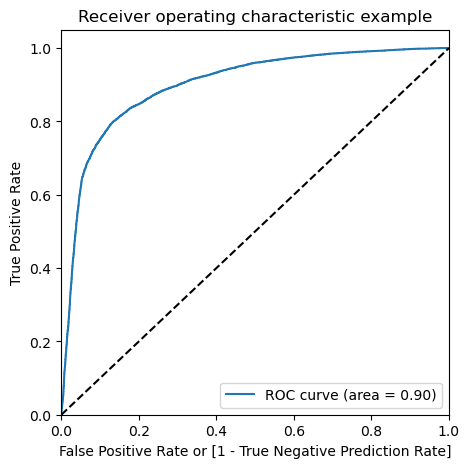

In [414]:
# Plotting the curve for the obtained metrics
draw_roc(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob)

#### Finding Optimal Cutoff Point


In [415]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.462133,0,1,1,1,1,1,0,0,0,0,0
1,1,0.929693,1,1,1,1,1,1,1,1,1,1,1
2,0,0.023311,0,1,0,0,0,0,0,0,0,0,0
3,0,0.521673,1,1,1,1,1,1,1,0,0,0,0
4,0,0.735334,1,1,1,1,1,1,1,1,1,0,0


In [416]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.500000     1.000000     0.000000
0.1          0.1  0.683293     0.974957     0.391629
0.2          0.2  0.743065     0.951228     0.534901
0.3          0.3  0.782255     0.919958     0.644552
0.4          0.4  0.810377     0.885368     0.735386
0.5          0.5  0.824870     0.845175     0.804566
0.6          0.6  0.832722     0.796749     0.868696
0.7          0.7  0.819613     0.722103     0.917122
0.8          0.8  0.766482     0.577793     0.955171
0.9          0.9  0.608717     0.234521     0.982912


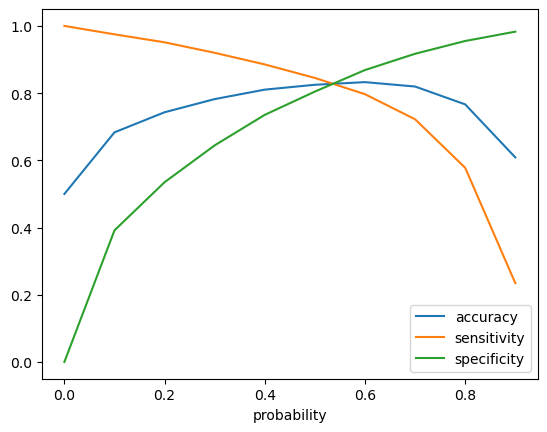

In [417]:
# plotting accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

**Initially we selected the optimum point of classification as 0.5.<br><br>From the above graph, we can see the optimum cutoff is slightly higher than 0.5 but lies lower than 0.6. So lets tweek a little more within this range.**

In [418]:
# Let's create columns with refined probability cutoffs 
numbers = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,...,0.9,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59
0,0,0.462133,0,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0.929693,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,0,0.023311,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0.521673,1,1,1,1,1,1,1,0,...,0,1,1,0,0,0,0,0,0,0
4,0,0.735334,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1


In [419]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

      probability  accuracy  sensitivity  specificity
0.50         0.50  0.824870     0.845175     0.804566
0.51         0.51  0.826773     0.842062     0.811484
0.52         0.52  0.828571     0.838395     0.818748
0.53         0.53  0.829298     0.833068     0.825527
0.54         0.54  0.829505     0.827534     0.831477
0.55         0.55  0.830439     0.822899     0.837980
0.56         0.56  0.831235     0.818402     0.844068
0.57         0.57  0.831581     0.813767     0.849395
0.58         0.58  0.831615     0.807887     0.855344
0.59         0.59  0.832065     0.802629     0.861501


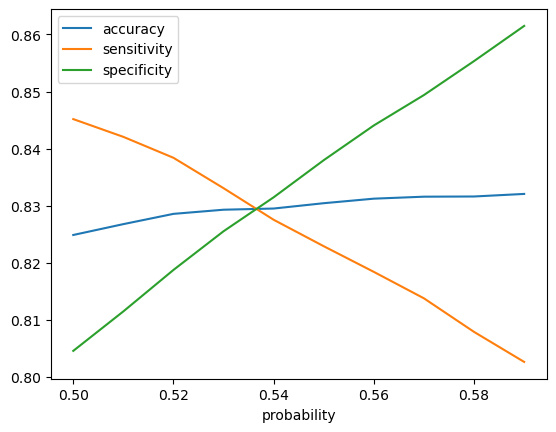

In [420]:
# plotting accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

**From the above graph we can conclude, the optimal cutoff point in the probability to define the predicted churn variabe converges at `0.54`**

In [421]:
#### From the curve above,we can take 0.54 is the optimum point to take it as a cutoff probability.

y_train_sm_pred_final['final_churn_pred'] = y_train_sm_pred_final.Converted_prob.map( lambda x: 1 if x > 0.53 else 0)

y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,...,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,final_churn_pred
0,0,0.462133,0,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0.929693,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,0,0.023311,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0.521673,1,1,1,1,1,1,1,0,...,1,1,0,0,0,0,0,0,0,0
4,0,0.735334,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [422]:
# Calculating the ovearall accuracy again
print("The overall accuracy of the model now is:",metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_churn_pred))

The overall accuracy of the model now is: 0.8292978208232445


In [423]:
confusion2 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_churn_pred )
print(confusion2)

[[11933  2522]
 [ 2413 12042]]


In [424]:
TP2 = confusion2[1,1] # true positive 
TN2 = confusion2[0,0] # true negatives
FP2 = confusion2[0,1] # false positives
FN2 = confusion2[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP2 / float(TP2+FN2))

# Let us calculate specificity
print("Specificity = ",TN2 / float(TN2+FP2))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP2/ float(TN2+FP2))

# positive predictive value 
print ("Precision = ",TP2 / float(TP2+FP2))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN2 / float(TN2 + FN2))

Sensitivity =  0.8330681425112418
Specificity =  0.8255274991352474
False Positive Rate =  0.1744725008647527
Precision =  0.826833287558363
True Negative Prediction Rate =  0.8317998048236442


#### Precision and recall tradeoff


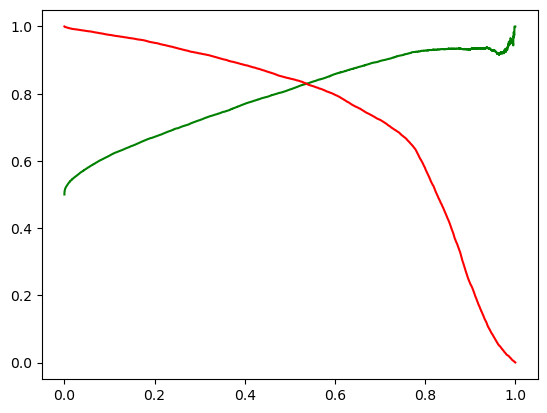

In [425]:
p, r, thresholds = precision_recall_curve(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob)

# Plotting the curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the test set
**Transforming and feature selection for test data**

In [426]:
# Scaling the test data
X_test[num_col] = scaler.transform(X_test[num_col])
X_test.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,isd_og_mou_8,...,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,fb_user_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,tenure,avg_arpu_6_7
15213,0.027423,0.010572,0.001738,0.000000,0.230827,0.038560,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.072464,0.031985
4229,0.034596,0.044357,0.003550,0.005270,0.013873,0.019583,0.004036,0.000000,0.000002,0.0,...,0.000000,0.0,0.0,0.0,1.0,0.007328,0.020946,0.016365,0.014493,0.025160
12573,0.029726,0.029326,0.009352,0.000068,0.136577,0.213513,0.009037,0.000085,0.009004,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.033341
19178,0.052097,0.078142,0.049328,0.041272,0.059096,0.048713,0.061279,0.049712,0.040981,0.0,...,0.045455,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.007246,0.036936
15524,0.027423,0.107705,0.037836,0.000000,0.098439,0.067828,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.072464,0.032732


In [427]:
# Feature selection
X_test=X_test[rfe_columns]
X_test.head()

,arpu_8,onnet_mou_7,offnet_mou_6,offnet_mou_7,total_og_mou_8,std_ic_mou_8,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,aug_vbc_3g,avg_arpu_6_7
15213,0.027423,0.001738,0.230827,0.038560,0.00000,0.000000,0.000000,0.141176,0.036232,0.021739,0.000000,0.027431,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.031985
4229,0.034596,0.003550,0.013873,0.019583,0.00661,0.000731,0.023340,0.052941,0.043478,0.021739,0.004303,0.029925,0.039335,0.002909,0.016452,0.4,0.000000,0.0,0.007328,0.025160
12573,0.029726,0.009352,0.136577,0.213513,0.00920,0.000365,0.000585,0.052941,0.079710,0.021739,0.000662,0.027431,0.006743,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.033341
19178,0.052097,0.049328,0.059096,0.048713,0.09174,0.000524,0.036805,0.182353,0.289855,0.239130,0.021536,0.022444,0.022477,0.008589,0.000000,0.0,0.045455,0.0,0.000000,0.036936
15524,0.027423,0.037836,0.098439,0.067828,0.00000,0.000000,0.000000,0.111765,0.079710,0.043478,0.000000,0.027431,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.032732


In [428]:
# Adding constant to the test model.
X_test_SM = sm.add_constant(X_test)

## Predicting the target variable

In [429]:
y_test_pred = res.predict(X_test_SM)
print("\n The first ten probability value of the prediction are:\n",y_test_pred[:10])


 The first ten probability value of the prediction are:
 15213    0.899673
4229     0.063684
12573    0.919032
19178    0.063022
15524    0.903480
17429    0.820392
9740     0.276279
12546    0.002772
20591    0.178271
13319    0.181919
dtype: float64


In [430]:
y_pred = pd.DataFrame(y_test_pred)
y_pred.head()

,0
15213,0.899673
4229,0.063684
12573,0.919032
19178,0.063022
15524,0.903480


In [431]:
y_pred=y_pred.rename(columns = {0:"Conv_prob"})

In [432]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn_probability
15213,1
4229,0
12573,0
19178,0
15524,1


In [433]:
y_pred_final = pd.concat([y_test_df,y_pred],axis=1)
y_pred_final.head()

,churn_probability,Conv_prob
15213,1,0.899673
4229,0,0.063684
12573,0,0.919032
19178,0,0.063022
15524,1,0.903480


In [434]:
y_pred_final['test_churn_pred'] = y_pred_final.Conv_prob.map(lambda x: 1 if x>0.54 else 0)
y_pred_final.head()

,churn_probability,Conv_prob,test_churn_pred
15213,1,0.899673,1
4229,0,0.063684,0
12573,0,0.919032,1
19178,0,0.063022,0
15524,1,0.903480,1


In [435]:
# Checking the overall accuracy of the predicted set.
metrics.accuracy_score(y_pred_final.churn_probability, y_pred_final.test_churn_pred)

0.828511610201751

**Metrics Evaluation**

In [436]:
# Confusion Matrix
confusion2_test = metrics.confusion_matrix(y_pred_final.churn_probability, y_pred_final.test_churn_pred)
print("Confusion Matrix\n",confusion2_test)

Confusion Matrix
 [[4004  815]
 [  86  349]]


In [437]:
# Calculating model validation parameters
TP3 = confusion2_test[1,1] # true positive 
TN3 = confusion2_test[0,0] # true negatives
FP3 = confusion2_test[0,1] # false positives
FN3 = confusion2_test[1,0] # false negatives

In [438]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP3 / float(TP3+FN3))

# Let us calculate specificity
print("Specificity = ",TN3 / float(TN3+FP3))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP3/ float(TN3+FP3))

# positive predictive value 
print ("Precision = ",TP3 / float(TP3+FP3))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN3 / float(TN3+FN3))

Sensitivity =  0.8022988505747126
Specificity =  0.8308777754720896
False Positive Rate =  0.16912222452791034
Precision =  0.29982817869415807
True Negative Prediction Rate =  0.9789731051344743


### Explaining the results

In [439]:
print("The accuracy of the predicted model is: ",round(metrics.accuracy_score(y_pred_final.churn_probability, y_pred_final.test_churn_pred),2)*100,"%")
print("The sensitivity of the predicted model is: ",round(TP3 / float(TP3+FN3),2)*100,"%")

print("\nAs the model created is based on a sentivity model, i.e. the True positive rate is given more importance as the actual and prediction of churn by a customer\n") 

The accuracy of the predicted model is:  83.0 %
The sensitivity of the predicted model is:  80.0 %

As the model created is based on a sentivity model, i.e. the True positive rate is given more importance as the actual and prediction of churn by a customer



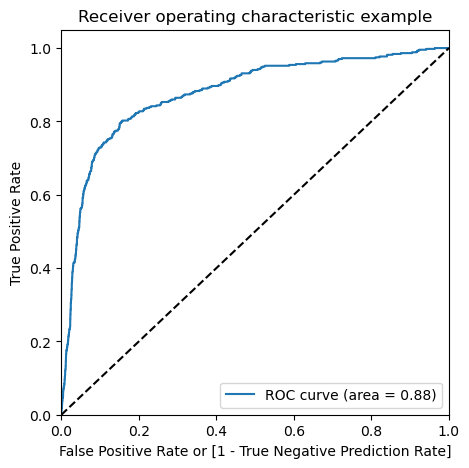

In [440]:
# ROC curve for the test dataset

# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final.churn_probability,y_pred_final.Conv_prob, drop_intermediate = False )
# Plotting the curve for the obtained metrics
draw_roc(y_pred_final.churn_probability,y_pred_final.Conv_prob)

## The AUC score for train dataset is 0.90 and the test dataset is 0.88.
# This model can be considered as a good model.**

# PCA

In [441]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=10)

In [442]:
X_train.shape

(16810, 52)

In [443]:
pca = PCA(random_state=42)

In [444]:
pca.fit(X_train)

PCA(random_state=42)

In [445]:
pca.components_

array([[-9.90426696e-03, -7.99182337e-02, -9.74727314e-02, ...,
         1.69848926e-01,  4.35447656e-05, -8.48816798e-03],
       [ 2.89311095e-01,  1.37346355e-01,  1.94653867e-01, ...,
         4.85641414e-02,  1.14273988e-05,  2.28091894e-01],
       [ 2.09177223e-01, -3.55776054e-01, -4.36148266e-01, ...,
        -8.86666119e-03,  2.99066021e-03,  1.33293061e-01],
       ...,
       [-1.38028760e-05, -2.34674783e-05,  4.40883678e-05, ...,
        -4.15145876e-05, -5.35559625e-05,  2.20451579e-05],
       [ 1.51530538e-05,  1.58107116e-05,  8.66603192e-05, ...,
        -1.68771451e-05, -6.33433153e-05, -1.55387058e-04],
       [ 3.29090533e-06, -1.00170417e-05, -3.46873775e-05, ...,
         4.05847431e-06, -1.46183671e-04, -7.30428886e-06]])

### Analysing the explained variance ratio

In [446]:
pca.explained_variance_ratio_

array([3.30757137e-01, 2.49757152e-01, 8.57094342e-02, 6.38745202e-02,
       4.43347508e-02, 3.43096102e-02, 3.36099665e-02, 3.05610553e-02,
       2.77727739e-02, 1.67762370e-02, 1.36537701e-02, 1.30483677e-02,
       7.50058659e-03, 6.74043417e-03, 6.28704581e-03, 5.68578769e-03,
       4.89873530e-03, 4.80169987e-03, 4.13830502e-03, 3.68999461e-03,
       2.31278963e-03, 2.23161812e-03, 1.89021336e-03, 1.48362031e-03,
       1.39183073e-03, 7.91994641e-04, 7.36442586e-04, 4.13517861e-04,
       3.46617688e-04, 1.68197691e-04, 1.23655371e-04, 8.38021042e-05,
       7.59094956e-05, 1.70732341e-05, 7.58275541e-06, 6.42388188e-06,
       3.60772927e-06, 3.11660159e-06, 1.79652537e-06, 1.54214163e-06,
       6.49773995e-07, 3.99551309e-07, 7.44145110e-08, 6.30229861e-08,
       2.30964343e-08, 1.78796157e-08, 1.60708675e-08, 1.42497337e-08,
       8.65279282e-09, 7.59070205e-09, 6.80550174e-09, 2.22153607e-09])

In [447]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

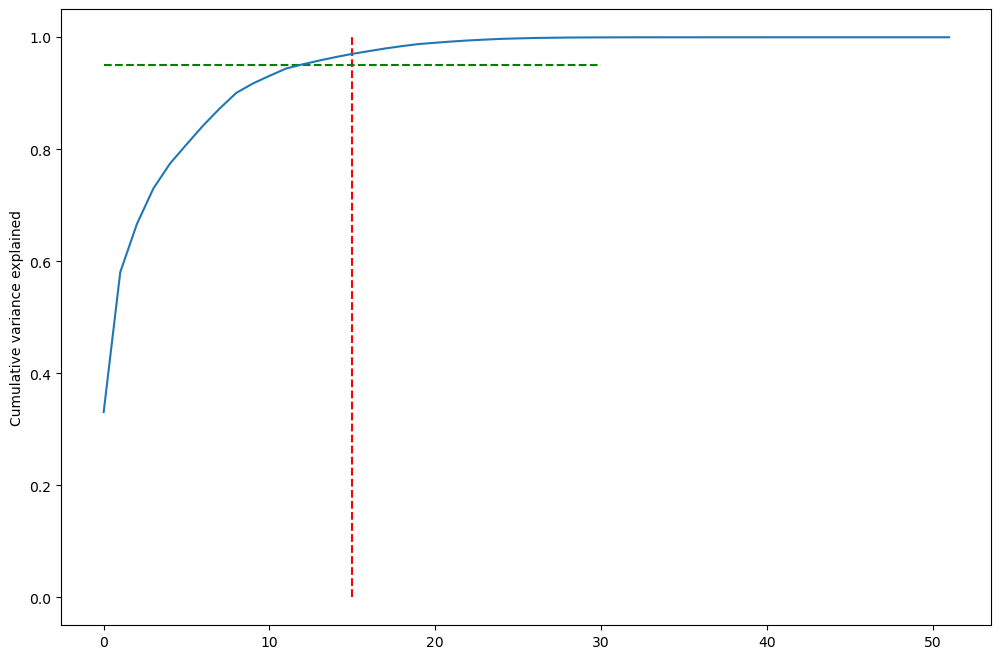

In [448]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

we can use IncrementalPCA for the best result

In [449]:
pca_final = IncrementalPCA(n_components=16)

In [450]:
df_train_pca = pca_final.fit_transform(X_train)

In [451]:
df_train_pca.shape

(16810, 16)

In [452]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [453]:
corrmat.shape

(16, 16)

In [454]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(4203, 16)

## Applying logistic regression on the Principal components

In [455]:
learner_pca = LogisticRegression()

In [456]:
model_pca = learner_pca.fit(df_train_pca, y_train)

## Making predictions on the test set


In [457]:
pred_probs_test = model_pca.predict_proba(df_test_pca)

In [458]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.88'

### Confusion matrix, Sensitivity and Specificity


In [459]:
pred_probs_test1 = model_pca.predict(df_test_pca)

In [460]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, pred_probs_test1)
print(confusion)

[[3836   38]
 [ 279   50]]


In [461]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [462]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, pred_probs_test1))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9245776826076612
Sensitivity:- 0.1519756838905775
Specificity:- 0.9901910170366546


## Making predictions on the train set

In [463]:
pred_probs_train = model_pca.predict_proba(df_train_pca)

In [464]:
"{:2.2}".format(metrics.roc_auc_score(y_train, pred_probs_train[:,1]))

'0.87'

### Confusion matrix, Sensitivity and Specificity


In [465]:
pred_probs_train1 = model_pca.predict(df_train_pca)

In [466]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, pred_probs_train1)
print(confusion)

[[15268   132]
 [ 1193   217]]


In [467]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [468]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, pred_probs_train1))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9211778703152885
Sensitivity:- 0.15390070921985816
Specificity:- 0.9914285714285714


## Decision Tree with PCA

In [469]:
from sklearn.tree import DecisionTreeClassifier

In [470]:
dt = DecisionTreeClassifier(random_state=42)

In [471]:
from sklearn.model_selection import GridSearchCV

In [472]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'min_samples_split': [50, 150, 50]
}

In [473]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [474]:
grid_search.fit(df_train_pca, y_train)

Fitting 4 folds for each of 75 candidates, totalling 300 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'min_samples_split': [50, 150, 50]},
             scoring='accuracy', verbose=1)

In [475]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.056408,0.006556,0.000773,0.000134,2,5,50,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.916012,0.916012,0.91623,0.91623,0.916121,0.000109,61
1,0.049084,0.006844,0.000745,0.000028,2,5,150,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.916012,0.916012,0.91623,0.91623,0.916121,0.000109,61
2,0.057149,0.005906,0.001591,0.000679,2,5,50,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.916012,0.916012,0.91623,0.91623,0.916121,0.000109,61
3,0.049564,0.007930,0.000549,0.000010,2,10,50,"{'max_depth': 2, 'min_samples_leaf': 10, 'min_...",0.916012,0.916012,0.91623,0.91623,0.916121,0.000109,61
4,0.054471,0.006231,0.000643,0.000170,2,10,150,"{'max_depth': 2, 'min_samples_leaf': 10, 'min_...",0.916012,0.916012,0.91623,0.91623,0.916121,0.000109,61


In [476]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
54,0.184998,0.005451,0.001008,0.000359,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.925054,0.925529,0.921228,0.923132,0.923736,0.001703,1
56,0.186188,0.014344,0.001093,0.000466,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.925054,0.925529,0.921228,0.923132,0.923736,0.001703,1
69,0.200269,0.024920,0.001845,0.001359,20,50,50,"{'max_depth': 20, 'min_samples_leaf': 50, 'min...",0.925054,0.925529,0.921228,0.923132,0.923736,0.001703,1
71,0.200970,0.022675,0.001059,0.000367,20,50,50,"{'max_depth': 20, 'min_samples_leaf': 50, 'min...",0.925054,0.925529,0.921228,0.923132,0.923736,0.001703,1
55,0.183511,0.019087,0.002212,0.002727,10,50,150,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.925291,0.923864,0.920990,0.922418,0.923141,0.001604,5


In [477]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=42)

In [478]:
dt_best = DecisionTreeClassifier( random_state = 42,
                                  max_depth=10, 
                                  min_samples_leaf=20,
                                  min_samples_split=50)

In [479]:
dt_best.fit(df_train_pca, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=20, min_samples_split=50,
                       random_state=42)

In [480]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [481]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(df_train_pca)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(df_train_pca)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(df_test_pca)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(df_test_pca)))

In [482]:
evaluate_model(dt_best)

Train Accuracy : 0.9365258774538965
Train Confusion Matrix:
[[15163   237]
 [  830   580]]
--------------------------------------------------
Test Accuracy : 0.926481084939329
Test Confusion Matrix:
[[3791   83]
 [ 226  103]]


##  Random Forest with PCA

In [483]:
from sklearn.ensemble import RandomForestClassifier

In [484]:
max_features = int(round(np.sqrt(X_train.shape[1])))    # number of variables to consider to split each node
print(max_features)

7


In [485]:
rf = RandomForestClassifier(n_estimators=100, max_depth=4, max_features=7, random_state=100, oob_score=True, verbose=1)

In [486]:
rf.fit(df_train_pca, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.6s finished


RandomForestClassifier(max_depth=4, max_features=7, oob_score=True,
                       random_state=100, verbose=1)

In [487]:
rf.oob_score_

0.9190362879238548

In [488]:
#from sklearn.metrics import plot_roc_curve
from sklearn.metrics import RocCurveDisplay

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


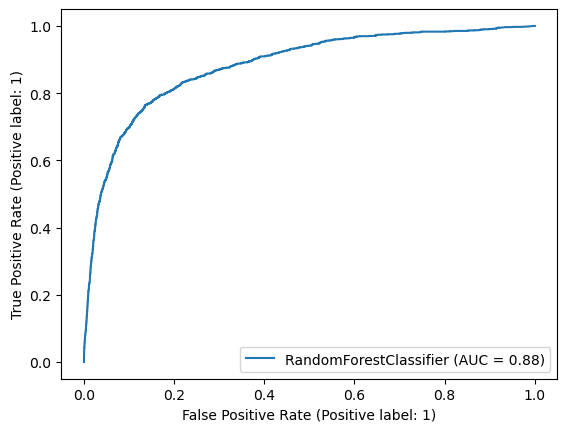

In [489]:
#plot_roc_curve(rf, df_train_pca, y_train)
RocCurveDisplay.from_estimator(rf, df_train_pca, y_train)
plt.show()

### Hyper-parameter tuning for the Random Forest

In [490]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [491]:
params = {
    'max_depth': [2,3,5],
    'min_samples_leaf': [50,100],
    'min_samples_split': [ 100, 150, ],
    'n_estimators': [100, 200 ]
}

In [492]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [493]:
grid_search.fit(df_train_pca, y_train)

Fitting 4 folds for each of 24 candidates, totalling 96 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5], 'min_samples_leaf': [50, 100],
                         'min_samples_split': [100, 150],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=1)

In [494]:
grid_search.best_score_ 

0.9187983544085767

In [495]:
grid_search.best_params_

{'max_depth': 5,
 'min_samples_leaf': 50,
 'min_samples_split': 100,
 'n_estimators': 100}

In [496]:
rfc_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             n_estimators=100)

In [497]:
rfc_model.fit(df_train_pca, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=100)

In [498]:
evaluate_model(rfc_model)

Train Accuracy : 0.9205829863176681
Train Confusion Matrix:
[[15347    53]
 [ 1282   128]]
--------------------------------------------------
Test Accuracy : 0.9238639067332858
Test Confusion Matrix:
[[3860   14]
 [ 306   23]]


In [499]:
rfc_model.feature_importances_

array([0.06282006, 0.15766581, 0.02554934, 0.09220783, 0.02286929,
       0.17679948, 0.07060159, 0.03083858, 0.05075326, 0.24247802,
       0.00798563, 0.02143097, 0.02087971, 0.00628221, 0.00483815,
       0.00600005])

#### Create LGBM Classifer with PCA Data

In [590]:
def evaluate_model_with_data(classifier, X, y):
    print("Train Accuracy :", accuracy_score(y, classifier.predict(X)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y, classifier.predict(X)))

In [591]:
# Hyper-parameters
param = {
    'num_leaves': 150,
    'max_depth':7,
    'learning_rate':.05,
    'max_bin':200,
    'metric': ['auc', 'binary_logloss'],
    'boosting_type': 'gbdt'
}

In [592]:
# LightGBM Learning Algo
import lightgbm as gbm
lgb_classifier_after_pca = gbm.LGBMClassifier(random_state=42, **param)

In [593]:
lgb_classifier_after_pca.fit(df_train_pca, y_train)

[LightGBM] [Info] Number of positive: 1410, number of negative: 15400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001473 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3200
[LightGBM] [Info] Number of data points in the train set: 16810, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.083879 -> initscore=-2.390778
[LightGBM] [Info] Start training from score -2.390778
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

LGBMClassifier(learning_rate=0.05, max_bin=200, max_depth=7,
               metric=['auc', 'binary_logloss'], num_leaves=150,
               random_state=42)

In [600]:
evaluate_model_with_data(lgb_classifier_after_pca, df_test_pca, y_test)

Train Accuracy : 0.9352843207232929
Train Confusion Matrix:
[[3801   73]
 [ 199  130]]


In [ ]:
evaluate_model_with_data(lgb_classifier_after_pca, df_test_pca, y_test)

## Note:

Note that the best parameters procuded the accuracy of 91% which is not significantly deterred than the accuracy of original random forest, which is pegged around 92%

## Conclusion :

The best model to predict the churn is observed to be Random Forest based on the accuracy as performance measure.


The incoming calls (with local same operator mobile/other operator mobile/fixed lines, STD or Special) plays a vital role in understanding the possibility of churn. Hence, the operator should focus on incoming calls data and has to provide some kind of special offers to the customers whose incoming calls turning lower.

## Details:

 After cleaning the data, we broadly employed three models as mentioned below including some variations within these models in order to arrive at the best model in each of the cases.

### Logistic Regression  :

Logistic Regression with RFE Logistic regression with PCA Random Forest For each of these models, the summary of performance measures are as follows:

#### Logistic Regression

.  Train Accuracy : ~90%
. Test Accuracy : ~88%

#### Logistic regression with PCA

. Train Accuracy : ~92%
. Test Accuracy : ~92%

#### Decision Tree with PCA:

. Train Accuracy : ~94%
. Test Accuracy : ~93%


#### Random Forest with PCA:
. Train Accuracy :~ 92%
. Test Accuracy :~ 92%

### This sequence is not required.

In [ ]:
data_test = pd.read_csv("test.csv")

In [ ]:
data_test.head()

In [ ]:
data_test.shape

In [ ]:
data_test.isnull().sum()

In [ ]:
data_id = data_test['id']

In [ ]:
data_test['tenure'] = (data_test['aon']/30).round(0)
data_test["avg_arpu_6_7"]= (data_test['arpu_6']+data_test['arpu_7'])/2

data_test = data_test[X.columns]

In [ ]:
data_test.shape

In [ ]:
data_test_null = data_test.isnull().sum().sum() / np.product(data_test.shape) * 100
data_test_null

In [ ]:
for col in data_test.columns:
    null_col = data_test[col].isnull().sum() / data_test.shape[0] * 100
    print("{} : {:.2f}".format(col,null_col))

In [ ]:
for col in data_test.columns:
    null_col = data_test[col].isnull().sum() / data_test.shape[0] * 100
    if null_col > 0:
        data_test[col] = data_test[col].fillna(data_test[col].mode()[0])

In [ ]:
data_test.isnull().sum().sum()


In [ ]:
data_test_final = pca_final.transform(data_test)

In [ ]:
data_test_final.shape

In [ ]:
predict_probalbilty = rfc_model.predict(data_test_final)

In [ ]:
predict_probalbilty.shape

In [ ]:
len(data_id)

In [ ]:
final_prediction = pd.DataFrame({'id':data_id,'churn_probability':predict_probalbilty})

In [ ]:
final_prediction.to_csv('submission.csv',index=False)
final_prediction.head

# Doing the same for test data

In [536]:
# read data
df_unseen = pd.read_csv("test.csv")

In [537]:
# Checking the null value percentage
df_unseen.isna().sum()/df_unseen.isna().count()*100

id                 0.000000
circle_id          0.000000
loc_og_t2o_mou     1.053333
std_og_t2o_mou     1.053333
loc_ic_t2o_mou     1.053333
                    ...    
fb_user_8         73.593333
aon                0.000000
aug_vbc_3g         0.000000
jul_vbc_3g         0.000000
jun_vbc_3g         0.000000
Length: 171, dtype: float64

In [538]:
# Checking for the duplicates
df_unseen.drop_duplicates(subset=None, inplace=True)
df_unseen.shape

(30000, 171)

In [539]:
# [Analysis]
# some recharge columns have minimum value of 1 while some don't have
recharge_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 
                 ]

df_unseen[recharge_cols].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8
count,7585.000000,7706.000000,7922.000000,7585.000000,7706.000000,7922.000000,7585.000000,7706.000000,7922.000000,7585.000000,7706.000000,7922.000000,7585.000000,7706.000000,7922.000000
mean,2.454977,2.634960,2.650972,1.863151,2.017778,2.016915,0.591826,0.617181,0.634057,126.146473,127.488451,126.513254,192.068004,199.880903,199.178710
std,2.776552,2.932158,3.013204,2.579382,2.693674,2.701347,1.263132,1.378931,1.339962,106.428898,110.474812,108.948608,197.264397,193.146529,189.006928
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.500000,0.500000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,25.000000,25.000000,25.000000,82.000000,92.000000,91.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,145.000000,145.000000,145.000000,154.000000,154.000000,154.000000
75%,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,154.000000,177.000000,179.000000,252.000000,252.000000,252.000000
max,55.000000,44.000000,57.000000,39.000000,31.000000,34.000000,28.000000,35.000000,30.000000,1555.000000,1555.000000,1555.000000,7546.000000,3765.000000,2520.000000


 We can create new feature as total_rech_amt_data using total_rech_data and av_rech_amt_data to capture amount utilized by customer for data.

 Also as the minimum value is 1 we can impute the NA values by 0, Considering there were no recharges done by the customer.

In [540]:
# It is also observed that the recharge date and the recharge value are missing together which means the customer didn't recharge
df_unseen.loc[df_unseen.total_rech_data_6.isnull() & df_unseen.date_of_last_rech_data_6.isnull(), ["total_rech_data_6", "date_of_last_rech_data_6"]].head(20)

,total_rech_data_6,date_of_last_rech_data_6
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN


In the recharge variables where minumum value is 1, we can impute missing values with zeroes since it means customer didn't recharge their numbers that month.

#### Impute Zero Values for Recharge columns

In [541]:
# [Action]

# create a list of recharge columns where we will impute missing values with zeroes
zero_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8'
       ]

In [542]:
# impute missing values with 0
df_unseen[zero_impute] = df_unseen[zero_impute].apply(lambda x: x.fillna(0))

In [543]:
# now we have to  make sure the values are imputed correctly for that we can check "Missing value ratio"
df_unseen[zero_impute].isnull().sum()*100/df_unseen.shape[1]

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
dtype: float64

In [544]:
# now we can check the "statistics Summary"
df_unseen[zero_impute].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,0.620700,0.676833,0.700033,48.561194,51.342741,52.596458,31.894033,32.747533,33.407933
std,1.757138,1.879782,1.939874,129.640618,131.180208,130.929389,76.614487,78.976636,79.023333
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,14.000000,17.000000,23.000000,14.000000,17.000000,17.000000
max,55.000000,44.000000,57.000000,7546.000000,3765.000000,2520.000000,1555.000000,1555.000000,1555.000000


In [545]:
# [Analysis]
# now we can create some column name list by there types using description of columns
id_cols = ['id', 'circle_id']

date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',             
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',             
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8'             
            ]

cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',             
             'fb_user_6',
             'fb_user_7',
             'fb_user_8'             
            ]

num_cols = [column for column in df_unseen.columns if column not in id_cols + date_cols + cat_cols]

# print the number of columns in each list
print("#ID cols: %d\n#Date cols:%d\n#Numeric cols:%d\n#Category cols:%d" % (len(id_cols), len(date_cols), len(num_cols), len(cat_cols)))

# check if we have missed any column or not
print(len(id_cols) + len(date_cols) + len(num_cols) + len(cat_cols) == df_unseen.shape[1])

#ID cols: 2
#Date cols:9
#Numeric cols:154
#Category cols:6
True


In [546]:
# [Action]
# drop id and date columns
df_unseen = df_unseen.drop(id_cols + date_cols, axis=1)
#check the shape again
df_unseen.shape

(30000, 160)

In [547]:
# replace missing values with '-1' in categorical columns
df_unseen[cat_cols] = df_unseen[cat_cols].apply(lambda x: x.fillna(-1))

In [548]:
# missing value ratio
df_unseen[cat_cols].isnull().sum()*100/df_unseen.shape[0]

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
dtype: float64

Droping variables with more than 70% of missing values (we can call it as threshold )

In [549]:
(df_unseen.isnull().sum() / df_unseen.isnull().count() * 100).sort_values(ascending=False).head(15)

count_rech_3g_6     74.716667
arpu_2g_6           74.716667
count_rech_2g_6     74.716667
arpu_3g_6           74.716667
arpu_2g_7           74.313333
count_rech_2g_7     74.313333
count_rech_3g_7     74.313333
arpu_3g_7           74.313333
arpu_3g_8           73.593333
count_rech_2g_8     73.593333
count_rech_3g_8     73.593333
arpu_2g_8           73.593333
std_og_t2m_mou_8     5.583333
std_og_t2f_mou_8     5.583333
std_og_t2c_mou_8     5.583333
dtype: float64

In [550]:
# [Action]
initial_cols = df_unseen.shape[1]

MISSING_THRESHOLD = 0.7

include_cols = list(df_unseen.apply(lambda column: True if column.isnull().sum()/df_unseen.shape[0] < MISSING_THRESHOLD else False))

drop_missing = pd.DataFrame({'features':df_unseen.columns , 'include': include_cols})
drop_missing.loc[drop_missing.include == True,:]

,features,include
0,loc_og_t2o_mou,True
1,std_og_t2o_mou,True
2,loc_ic_t2o_mou,True
3,arpu_6,True
4,arpu_7,True
...,...,...
155,fb_user_8,True
156,aon,True
157,aug_vbc_3g,True
158,jul_vbc_3g,True


In [551]:
# [Action]
# now we can drop  some more columns
df_unseen = df_unseen.loc[:, include_cols]

dropped_cols = df_unseen.shape[1] - initial_cols
dropped_cols

-12

In [552]:
#rechecking the shape of a dataframe
df_unseen.shape

(30000, 148)

In [553]:
# rechecking the missing values for how many missing values has left
df_unseen.isnull().sum()*100/df_unseen.shape[0]

loc_og_t2o_mou    1.053333
std_og_t2o_mou    1.053333
loc_ic_t2o_mou    1.053333
arpu_6            0.000000
arpu_7            0.000000
                    ...   
fb_user_8         0.000000
aon               0.000000
aug_vbc_3g        0.000000
jul_vbc_3g        0.000000
jun_vbc_3g        0.000000
Length: 148, dtype: float64

In [554]:
# [Action]
num_cols = [column for column in df_unseen.columns if column not in id_cols + date_cols + cat_cols]
num_cols

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou

In [555]:
#imputing with meadian for num_cols
df_unseen[num_cols] = df_unseen[num_cols].apply(lambda x: x.fillna(x.median()))

In [556]:
#again checking for the missing values
df_unseen.isnull().sum()*100/df_unseen.shape[0]

loc_og_t2o_mou    0.0
std_og_t2o_mou    0.0
loc_ic_t2o_mou    0.0
arpu_6            0.0
arpu_7            0.0
                 ... 
fb_user_8         0.0
aon               0.0
aug_vbc_3g        0.0
jul_vbc_3g        0.0
jun_vbc_3g        0.0
Length: 148, dtype: float64

In churn prediction, we assume that there are three phases of customer lifecycle :

- The ‘good & action’ phase [Month 6 & 7]
- The ‘churn’ phase [Month 8]
In this case, since we are working over a three-month window, the first two months are the ‘good & action’ phase, the third month is the ‘churn’ phase.

In [557]:
#data['total_rech_amt_data_6']=data['av_rech_amt_data_6'] * data['total_rech_data_6']
# data['total_rech_amt_data_7']=data['av_rech_amt_data_7'] * data['total_rech_data_7']

# # Calculating the overall recharge amount for the months 6,7 and 8

# data['overall_rech_amt_6'] = data['total_rech_amt_data_6'] + data['total_rech_amt_6']
# data['overall_rech_amt_7'] = data['total_rech_amt_data_7'] + data['total_rech_amt_7']

# [Action]
df_unseen.drop(['av_rech_amt_data_6',
                   'total_rech_data_6','total_rech_amt_6',
                  'av_rech_amt_data_7',
                   'total_rech_data_7','total_rech_amt_7'], axis=1, inplace=True)

In [558]:
# [Action]
col_to_drop=['fb_user_6','fb_user_7','total_ic_mou_6','total_ic_mou_7',               
               'std_og_t2t_mou_7','std_og_t2t_mou_6' ,'std_og_t2m_mou_7','std_ic_mou_7',]

# These columns can be dropped as they are highly collinered with other predictor variables.
# criteria set is for collinearity of 85%

#  dropping these column
df_unseen.drop(col_to_drop, axis=1, inplace=True)

In [559]:
# The curent dimension of the dataset after dropping few unwanted columns
df_unseen.shape

(30000, 134)

# Step 4:
# Data preparation

# i.Deriving new variables to understand the data 

# ii.EDA

In [560]:
# We have a column called 'aon'

# we can derive new variables from this to explain the data w.r.t churn.

# creating a new variable 'tenure'
# [Action]
df_unseen['tenure'] = (df_unseen['aon']/30).round(0)

# Since we derived a new column from 'aon', we can drop it
df_unseen.drop('aon',axis=1, inplace=True)

In [561]:
df_unseen["avg_arpu_6_7"]= (df_unseen['arpu_6']+df_unseen['arpu_7'])/2

In [562]:
# Lets drop the original columns as they are derived to a new column for better understanding of the data

df_unseen.drop(['arpu_6','arpu_7'], axis=1, inplace=True)


# The curent dimension of the dataset after dropping few unwanted columns
df_unseen.shape

(30000, 133)

As the number of recharge rate increases, the churn rate decreases clearly.

In [563]:
# [Action]
# So many feilds are dropped
df_unseen.drop(['av_rech_amt_data_8','total_rech_data_8','sachet_2g_6','sachet_2g_7','sachet_3g_6',
              'sachet_3g_7','sachet_3g_8','last_day_rch_amt_6','last_day_rch_amt_7',
              'last_day_rch_amt_8',], axis=1, inplace=True)

In [564]:
# [Action]
# So many feilds are dropped
df_unseen.drop(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou','roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 
         'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
         'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
         'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 
         'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7',
         'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'spl_og_mou_6',
         'spl_og_mou_7', 'spl_og_mou_8','total_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 
         'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8',
         'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 
         'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8',
         'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_mou_6', 'spl_ic_mou_6', 'spl_ic_mou_7',
         'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8',], axis=1, inplace=True)

In [565]:
df_unseen.shape

(30000, 52)

In [566]:
df_unseen.columns.difference(data_filtered.columns)

Index([], dtype='object')

In [567]:
data_filtered.columns.difference(df_unseen.columns)

Index(['churn_probability'], dtype='object')

In [301]:
data_filtered.shape

(21013, 53)

In [ ]:
# divide data into train and test
X = data_filtered.drop("churn_probability", axis = 1)
y = data_filtered.churn_probability
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4, stratify = y)

In [ ]:
# print shapes of train and test sets
X_train.shape

In [ ]:
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# vi.Perform Scaling

In [568]:
# [Action]
num_col = df_unseen.select_dtypes(include = ['int64','float64']).columns.tolist()

In [569]:
df_unseen[num_col] = scaler.transform(df_unseen[num_col])

In [570]:
df_unseen.describe()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,isd_og_mou_8,...,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,fb_user_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,tenure,avg_arpu_6_7
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,0.035537,0.017202,0.015840,0.012781,0.022942,0.032728,0.013625,0.009759,0.005975,0.000175,...,0.010260,0.008463,0.005035,0.005327,0.249800,0.005289,0.007522,0.005364,0.250734,0.022976
std,0.009465,0.038711,0.036479,0.029497,0.037225,0.055661,0.023251,0.031837,0.019258,0.003101,...,0.036936,0.041510,0.024781,0.024509,0.424585,0.020398,0.030413,0.022040,0.232096,0.009223
min,0.023165,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.009347
25%,0.029864,0.001082,0.000899,0.000753,0.004347,0.005757,0.002480,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.072464,0.017400
50%,0.032981,0.004712,0.003990,0.003313,0.011460,0.015531,0.006626,0.000000,0.000240,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.159420,0.020388
75%,0.038087,0.015118,0.013342,0.010828,0.026326,0.036848,0.015259,0.003118,0.003267,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.391304,0.025467
max,0.419021,0.941390,0.908459,0.673901,0.832595,1.642076,0.967196,0.827082,0.961374,0.230077,...,0.772727,1.555556,0.750000,0.625000,1.000000,0.468743,0.872266,0.592370,0.971014,0.320913


As there are many variables we will start the process of dropping variables after doing the RFE

# Data Modeling and Model Evaluation and Prepare Model for Predictor variables selection


## Data Imbalance Handling
Using SMOTE method, we can balance the data w.r.t. churn variable and proceed further

In [ ]:
smote = SMOTE(random_state=42)
X_train_sm,y_train_sm = smote.fit_resample(X_train,y_train)

In [ ]:
import numpy as np
print(np.isnan(X_train).any())  # Check for NaN values in X_train


In [ ]:
print("Dimension of X_train_sm Shape:", X_train_sm.shape)
print("Dimension of y_train_sm Shape:", y_train_sm.shape)

# Logistic Regression

In [ ]:
# Logistic regression model
logm1 = sm.GLM(y_train_sm,(sm.add_constant(X_train_sm)), family = sm.families.Binomial())
logm1.fit().summary()

# Logistic Regression using Feature Selection (RFE method)


In [ ]:
logreg = LogisticRegression()

from sklearn.feature_selection import RFE

# running RFE with 20 variables as output
rfe = RFE(logreg,  n_features_to_select= 20)             
rfe = rfe.fit(X_train_sm, y_train_sm)

In [ ]:
rfe.support_

In [ ]:
rfe_columns=X_train_sm.columns[rfe.support_]
print("The selected columns by RFE for modelling are: \n\n",rfe_columns)

In [ ]:
list(zip(X_train_sm.columns, rfe.support_, rfe.ranking_))

# Assessing the model with StatsModels

In [ ]:
X_train_SM = sm.add_constant(X_train_sm[rfe_columns])
logm2 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

In [ ]:
# Getting the predicted values on the train set
y_train_sm_pred = res.predict(X_train_SM)
y_train_sm_pred = y_train_sm_pred.values.reshape(-1)
y_train_sm_pred[:10]

In [ ]:
# Creating a dataframe with the actual churn flag and the predicted probabilities
y_train_sm_pred_final = pd.DataFrame({'Converted':y_train_sm.values, 'Converted_prob':y_train_sm_pred})
y_train_sm_pred_final.head()

# Creating new column 'churn_pred' with 1 if Churn_Prob > 0.8 else 0

In [ ]:
y_train_sm_pred_final['churn_pred'] = y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Viewing the prediction results
y_train_sm_pred_final.head()

In [ ]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred )
print(confusion)

# Confusion matrix

# Predicted     not_churn    churn
# Actual

# not_churn     11630           2825
                    
# churn             2238            12217  

In [ ]:
# Checking the overall accuracy.
print("The overall accuracy of the model is:",metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred))

# Check for the VIF values of the feature variables


In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm[rfe_columns].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[rfe_columns].values, i) for i in range(X_train_sm[rfe_columns].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

## Metrics beyond simply accuracy


In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP / float(TP+FN))

# Let us calculate specificity
print("Specificity = ",TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP/ float(TN+FP))

# positive predictive value 
print ("Precision = ",TP / float(TP+FP))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN / float(TN+ FN))

#### Plotting the ROC Curve

In [ ]:
# Defining a function to plot the roc curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Prediction Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve( y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob, drop_intermediate = False )

In [ ]:
# Plotting the curve for the obtained metrics
draw_roc(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob)

#### Finding Optimal Cutoff Point


In [ ]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

In [ ]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

In [ ]:
# plotting accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

**Initially we selected the optimum point of classification as 0.5.<br><br>From the above graph, we can see the optimum cutoff is slightly higher than 0.5 but lies lower than 0.6. So lets tweek a little more within this range.**

In [ ]:
# Let's create columns with refined probability cutoffs 
numbers = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

In [ ]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

In [ ]:
# plotting accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

**From the above graph we can conclude, the optimal cutoff point in the probability to define the predicted churn variabe converges at `0.54`**

In [ ]:
#### From the curve above,we can take 0.54 is the optimum point to take it as a cutoff probability.

y_train_sm_pred_final['final_churn_pred'] = y_train_sm_pred_final.Converted_prob.map( lambda x: 1 if x > 0.53 else 0)

y_train_sm_pred_final.head()

In [ ]:
# Calculating the ovearall accuracy again
print("The overall accuracy of the model now is:",metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_churn_pred))

In [ ]:
confusion2 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_churn_pred )
print(confusion2)

In [ ]:
TP2 = confusion2[1,1] # true positive 
TN2 = confusion2[0,0] # true negatives
FP2 = confusion2[0,1] # false positives
FN2 = confusion2[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP2 / float(TP2+FN2))

# Let us calculate specificity
print("Specificity = ",TN2 / float(TN2+FP2))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP2/ float(TN2+FP2))

# positive predictive value 
print ("Precision = ",TP2 / float(TP2+FP2))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN2 / float(TN2 + FN2))

#### Precision and recall tradeoff


In [ ]:
p, r, thresholds = precision_recall_curve(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob)

# Plotting the curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the test set
**Transforming and feature selection for test data**

In [ ]:
# Scaling the test data
X_test[num_col] = scaler.transform(X_test[num_col])
X_test.head()

In [ ]:
# Feature selection
X_test=X_test[rfe_columns]
X_test.head()

In [ ]:
# Adding constant to the test model.
X_test_SM = sm.add_constant(X_test)

## Predicting the target variable

In [ ]:
y_test_pred = res.predict(X_test_SM)
print("\n The first ten probability value of the prediction are:\n",y_test_pred[:10])

In [ ]:
y_pred = pd.DataFrame(y_test_pred)
y_pred.head()

In [ ]:
y_pred=y_pred.rename(columns = {0:"Conv_prob"})

In [ ]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

In [ ]:
y_pred_final = pd.concat([y_test_df,y_pred],axis=1)
y_pred_final.head()

In [ ]:
y_pred_final['test_churn_pred'] = y_pred_final.Conv_prob.map(lambda x: 1 if x>0.54 else 0)
y_pred_final.head()

In [ ]:
# Checking the overall accuracy of the predicted set.
metrics.accuracy_score(y_pred_final.churn_probability, y_pred_final.test_churn_pred)

**Metrics Evaluation**

In [ ]:
# Confusion Matrix
confusion2_test = metrics.confusion_matrix(y_pred_final.churn_probability, y_pred_final.test_churn_pred)
print("Confusion Matrix\n",confusion2_test)

In [ ]:
# Calculating model validation parameters
TP3 = confusion2_test[1,1] # true positive 
TN3 = confusion2_test[0,0] # true negatives
FP3 = confusion2_test[0,1] # false positives
FN3 = confusion2_test[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP3 / float(TP3+FN3))

# Let us calculate specificity
print("Specificity = ",TN3 / float(TN3+FP3))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP3/ float(TN3+FP3))

# positive predictive value 
print ("Precision = ",TP3 / float(TP3+FP3))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN3 / float(TN3+FN3))

### Explaining the results

In [ ]:
print("The accuracy of the predicted model is: ",round(metrics.accuracy_score(y_pred_final.churn_probability, y_pred_final.test_churn_pred),2)*100,"%")
print("The sensitivity of the predicted model is: ",round(TP3 / float(TP3+FN3),2)*100,"%")

print("\nAs the model created is based on a sentivity model, i.e. the True positive rate is given more importance as the actual and prediction of churn by a customer\n") 

In [ ]:
# ROC curve for the test dataset

# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final.churn_probability,y_pred_final.Conv_prob, drop_intermediate = False )
# Plotting the curve for the obtained metrics
draw_roc(y_pred_final.churn_probability,y_pred_final.Conv_prob)

## The AUC score for train dataset is 0.90 and the test dataset is 0.88.
# This model can be considered as a good model.**

# PCA

we can use IncrementalPCA for the best result

In [604]:
pca_unseen = IncrementalPCA(n_components=16)

In [605]:
df_unseen_pca = pca_unseen.fit_transform(df_unseen)

In [606]:
df_unseen_pca.shape

(30000, 16)

In [576]:
corrmat = np.corrcoef(df_unseen_pca.transpose())

In [577]:
corrmat.shape

(16, 16)

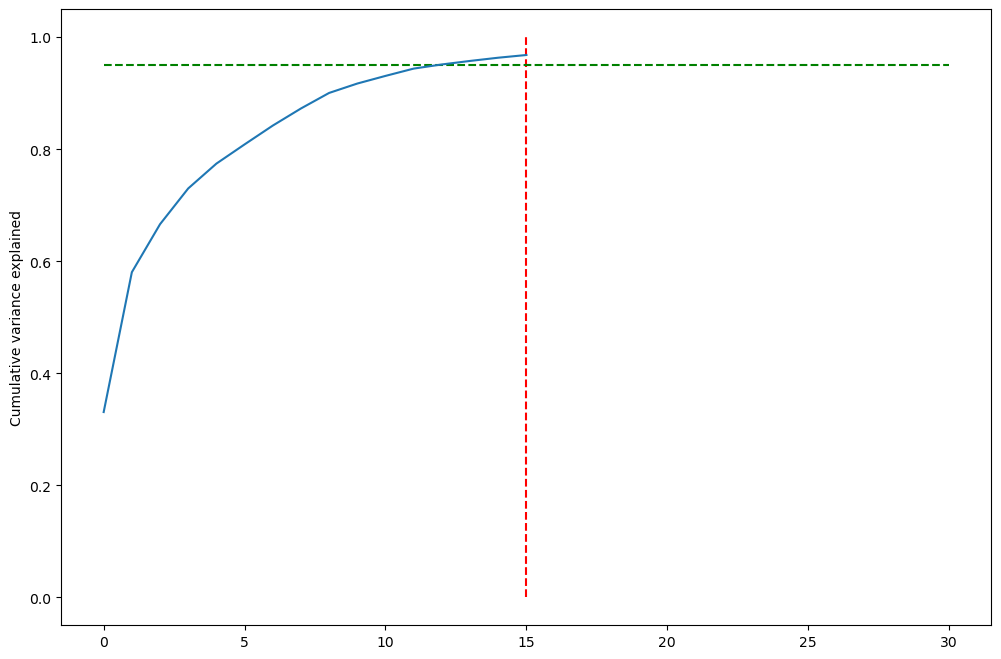

In [607]:
var_cumu = np.cumsum(pca_final.explained_variance_ratio_)

fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [ ]:
def evaluate_model_with_data(classifier, X, y):
    print("Train Accuracy :", accuracy_score(y, classifier.predict(X)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y, classifier.predict(X)))

In [ ]:
# Hyper-parameters
param = {
    'num_leaves': 150,
    'max_depth':7,
    'learning_rate':.05,
    'max_bin':200,
    'metric': ['auc', 'binary_logloss'],
    'boosting_type': 'gbdt'
}

In [ ]:
# LightGBM Learning Algo
import lightgbm as gbm
lgb_classifier_after_pca = gbm.LGBMClassifier(random_state=42, **param)

In [ ]:
lgb_classifier_after_pca.fit(df_train_pca, y_train)

In [ ]:
evaluate_model_with_data(lgb_classifier_after_pca, df_train_pca, y_train)

In [ ]:
evaluate_model_with_data(lgb_classifier_after_pca, df_test_pca, y_test)

## Applying logistic regression on the Principal components

In [ ]:
learner_pca = LogisticRegression()

In [ ]:
model_pca = learner_pca.fit(df_train_pca, y_train)

## Making predictions on the test set


In [ ]:
pred_probs_test = model_pca.predict_proba(df_test_pca)

In [ ]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

### Confusion matrix, Sensitivity and Specificity


In [ ]:
pred_probs_test1 = model_pca.predict(df_test_pca)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, pred_probs_test1)
print(confusion)

In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, pred_probs_test1))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

## Making predictions on the train set

In [ ]:
pred_probs_train = model_pca.predict_proba(df_train_pca)

In [ ]:
"{:2.2}".format(metrics.roc_auc_score(y_train, pred_probs_train[:,1]))

### Confusion matrix, Sensitivity and Specificity


In [ ]:
pred_probs_train1 = model_pca.predict(df_train_pca)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, pred_probs_train1)
print(confusion)

In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, pred_probs_train1))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

## Decision Tree with PCA

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier(random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'min_samples_split': [50, 150, 50]
}

In [ ]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [ ]:
grid_search.fit(df_train_pca, y_train)

In [ ]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

In [ ]:
score_df.nlargest(5,"mean_test_score")

In [ ]:
grid_search.best_estimator_

In [ ]:
dt_best = DecisionTreeClassifier( random_state = 42,
                                  max_depth=10, 
                                  min_samples_leaf=20,
                                  min_samples_split=50)

In [ ]:
dt_best.fit(df_train_pca, y_train)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(df_train_pca)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(df_train_pca)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(df_test_pca)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(df_test_pca)))

In [ ]:
evaluate_model(dt_best)

##  Random Forest with PCA

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
max_features = int(round(np.sqrt(X_train.shape[1])))    # number of variables to consider to split each node
print(max_features)

In [ ]:
rf = RandomForestClassifier(n_estimators=100, max_depth=4, max_features=7, random_state=100, oob_score=True, verbose=1)

In [ ]:
rf.fit(df_train_pca, y_train)

In [ ]:
rf.oob_score_

In [ ]:
#from sklearn.metrics import plot_roc_curve
from sklearn.metrics import RocCurveDisplay

In [ ]:
#plot_roc_curve(rf, df_train_pca, y_train)
RocCurveDisplay.from_estimator(rf, df_train_pca, y_train)
plt.show()

### Hyper-parameter tuning for the Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [ ]:
params = {
    'max_depth': [2,3,5],
    'min_samples_leaf': [50,100],
    'min_samples_split': [ 100, 150, ],
    'n_estimators': [100, 200 ]
}

In [ ]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [ ]:
grid_search.fit(df_train_pca, y_train)

In [ ]:
grid_search.best_score_ 

In [ ]:
grid_search.best_params_

In [ ]:
rfc_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             n_estimators=200)

In [ ]:
rfc_model.fit(df_train_pca, y_train)

In [ ]:
evaluate_model(rfc_model)

In [ ]:
rfc_model.feature_importances_

## Note:

Note that the best parameters procuded the accuracy of 91% which is not significantly deterred than the accuracy of original random forest, which is pegged around 92%

## Conclusion :

The best model to predict the churn is observed to be Random Forest based on the accuracy as performance measure.


The incoming calls (with local same operator mobile/other operator mobile/fixed lines, STD or Special) plays a vital role in understanding the possibility of churn. Hence, the operator should focus on incoming calls data and has to provide some kind of special offers to the customers whose incoming calls turning lower.

## Details:

 After cleaning the data, we broadly employed three models as mentioned below including some variations within these models in order to arrive at the best model in each of the cases.

### Logistic Regression  :

Logistic Regression with RFE Logistic regression with PCA Random Forest For each of these models, the summary of performance measures are as follows:

#### Logistic Regression

.  Train Accuracy : ~90%
. Test Accuracy : ~88%

#### Logistic regression with PCA

. Train Accuracy : ~92%
. Test Accuracy : ~92%

#### Decision Tree with PCA:

. Train Accuracy : ~94%
. Test Accuracy : ~93%


#### Random Forest with PCA:
. Train Accuracy :~ 92%
. Test Accuracy :~ 92%

In [608]:
data_test = pd.read_csv("test.csv")

In [ ]:
data_test.head()

In [ ]:
data_test.shape

In [ ]:
data_test.isnull().sum()

In [609]:
data_id = data_test['id']

In [ ]:
data_test['tenure'] = (data_test['aon']/30).round(0)
data_test["avg_arpu_6_7"]= (data_test['arpu_6']+data_test['arpu_7'])/2

data_test = data_test[X.columns]

In [ ]:
data_test.shape

In [ ]:
data_test_null = data_test.isnull().sum().sum() / np.product(data_test.shape) * 100
data_test_null

In [ ]:
for col in data_test.columns:
    null_col = data_test[col].isnull().sum() / data_test.shape[0] * 100
    print("{} : {:.2f}".format(col,null_col))

In [ ]:
for col in data_test.columns:
    null_col = data_test[col].isnull().sum() / data_test.shape[0] * 100
    if null_col > 0:
        data_test[col] = data_test[col].fillna(data_test[col].mode()[0])

In [ ]:
data_test.isnull().sum().sum()


In [585]:
data_test_final = dt_best.transform(data_test)

AttributeError: 'DecisionTreeClassifier' object has no attribute 'transform'

In [ ]:
data_test_final.shape

In [610]:
predict_probalbilty = lgb_classifier_after_pca.predict(df_unseen_pca)

In [611]:
pd.DataFrame(predict_probalbilty).value_counts()

0    30000
Name: count, dtype: int64

In [596]:
final_prediction = pd.DataFrame({'id':data_id,'churn_probability':predict_probalbilty})

In [597]:
final_prediction.to_csv('submission.csv',index=False)
final_prediction.head

<bound method NDFrame.head of           id  churn_probability
0      69999                  0
1      70000                  0
2      70001                  0
3      70002                  0
4      70003                  0
...      ...                ...
29995  99994                  0
29996  99995                  0
29997  99996                  0
29998  99997                  0
29999  99998                  0

[30000 rows x 2 columns]>